# (행정동별) 자동차, 주차장, 불법주차 분석

### 단변량분석

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['figure.max_open_warning'] = 50

In [5]:
pd.options.display.max_columns = 100

In [6]:
gangseo_car = pd.read_csv('C:/Users/User/Desktop/강서구 빅데이터 공모전/Merge 데이터/(행정동별 통합) 자동차, 주차장, 불법주차.csv')

In [7]:
gangseo_car.head(2)

,행정동명,주차장 개수,주차장 면수,공영 개수,공영 면수,민영 개수,민영 면수,노상 개수,노상 면수,노상 시영 개수,노상 시영 면수,노상 구영 개수,노상 구영 면수,노외 개수,노외 면수,노외 시영 개수,노외 시영 면수,노외 구영 개수,노외 구영 면수,노외 민영 개수,노외 민영 면수,건축물부설 개수,건축물부설 면수,건축물부설 일반주택 개수,건축물부설 일반주택 면수,건축물부설 공동주택 개수,건축물부설 공동주택 면수,건축물부설 일반건축물 개수,건축물부설 일반건축물 면수,공영주차장 수,공영주차장 총 주차면,승용,승합,특수,화물,자동차등록대수,단속건수
0,염창동,421,20668,15,125,406,20543,15,125,0,0,15,125,0,0,0,0,0,0,0,0,406,20543,23,118,153,12299,230,8126,0,0,13948,316,24,1296,15584,7495
1,등촌1동,473,13600,15,214,458,13386,14,203,0,0,14,203,1,11,0,0,1,11,0,0,458,13386,71,236,141,4259,246,8891,0,0,7852,292,23,876,9043,6341


In [8]:
gangseo_car.shape

(20, 37)

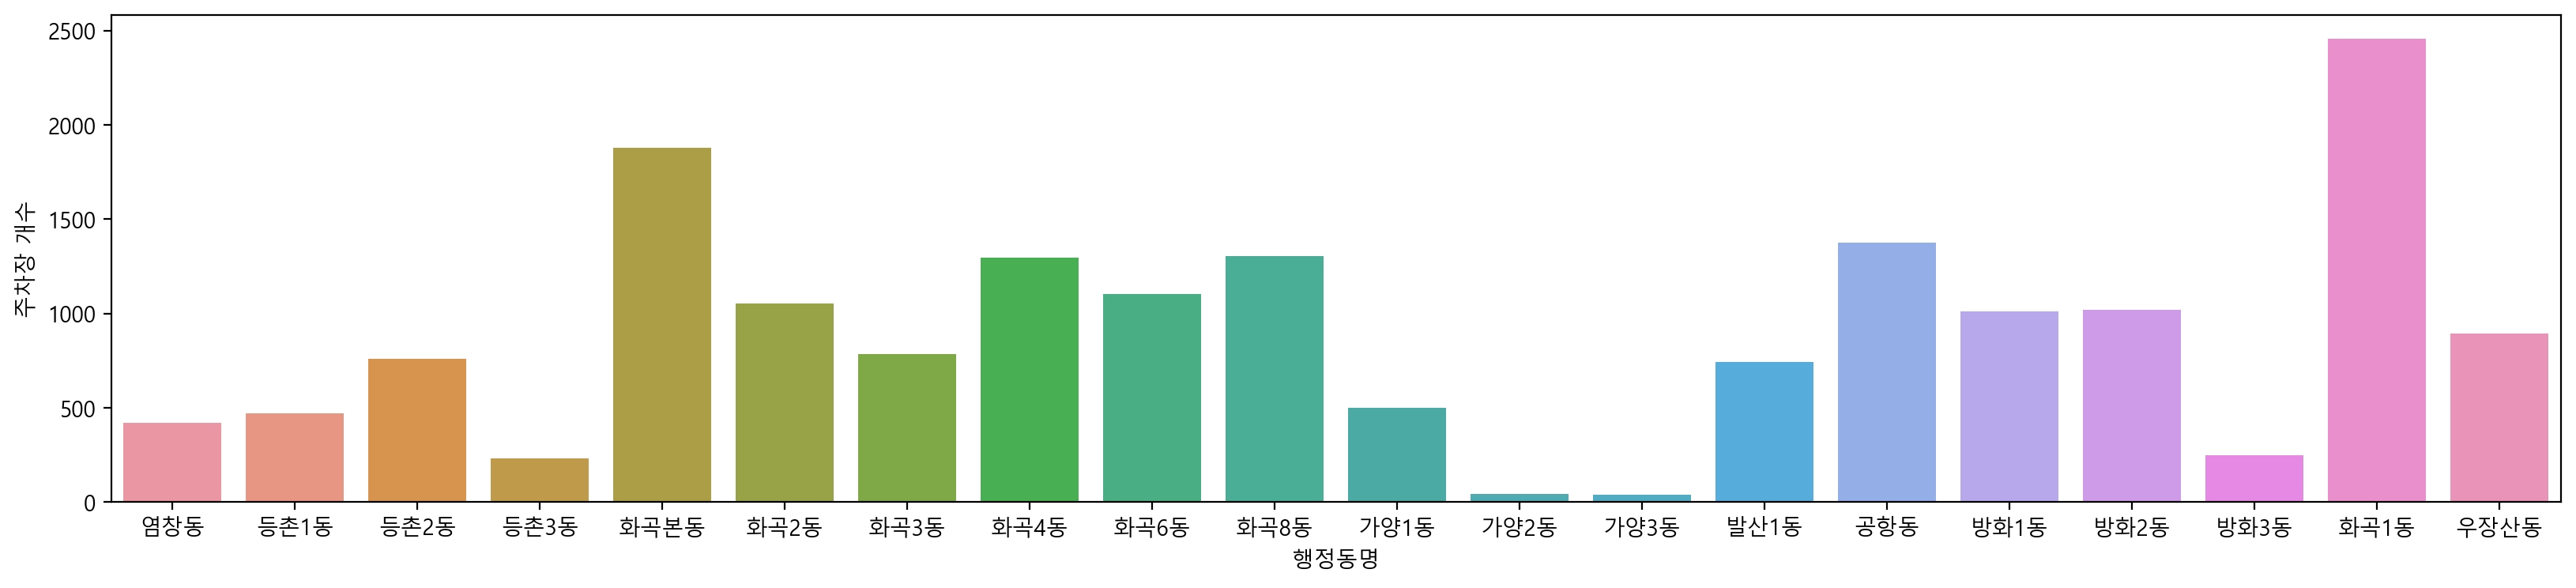

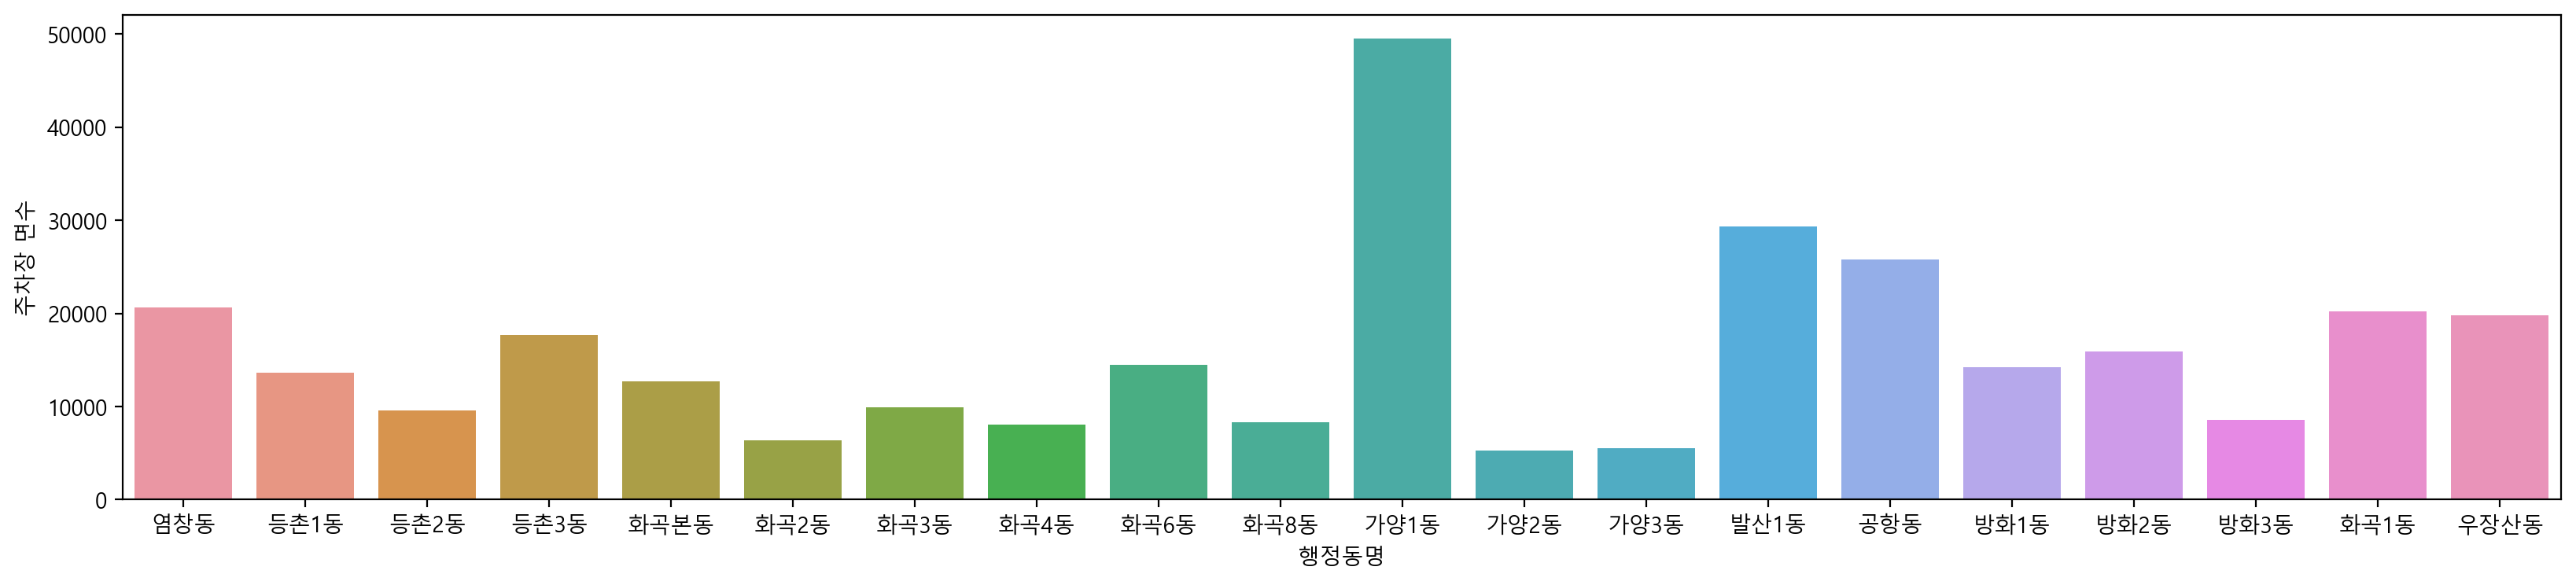

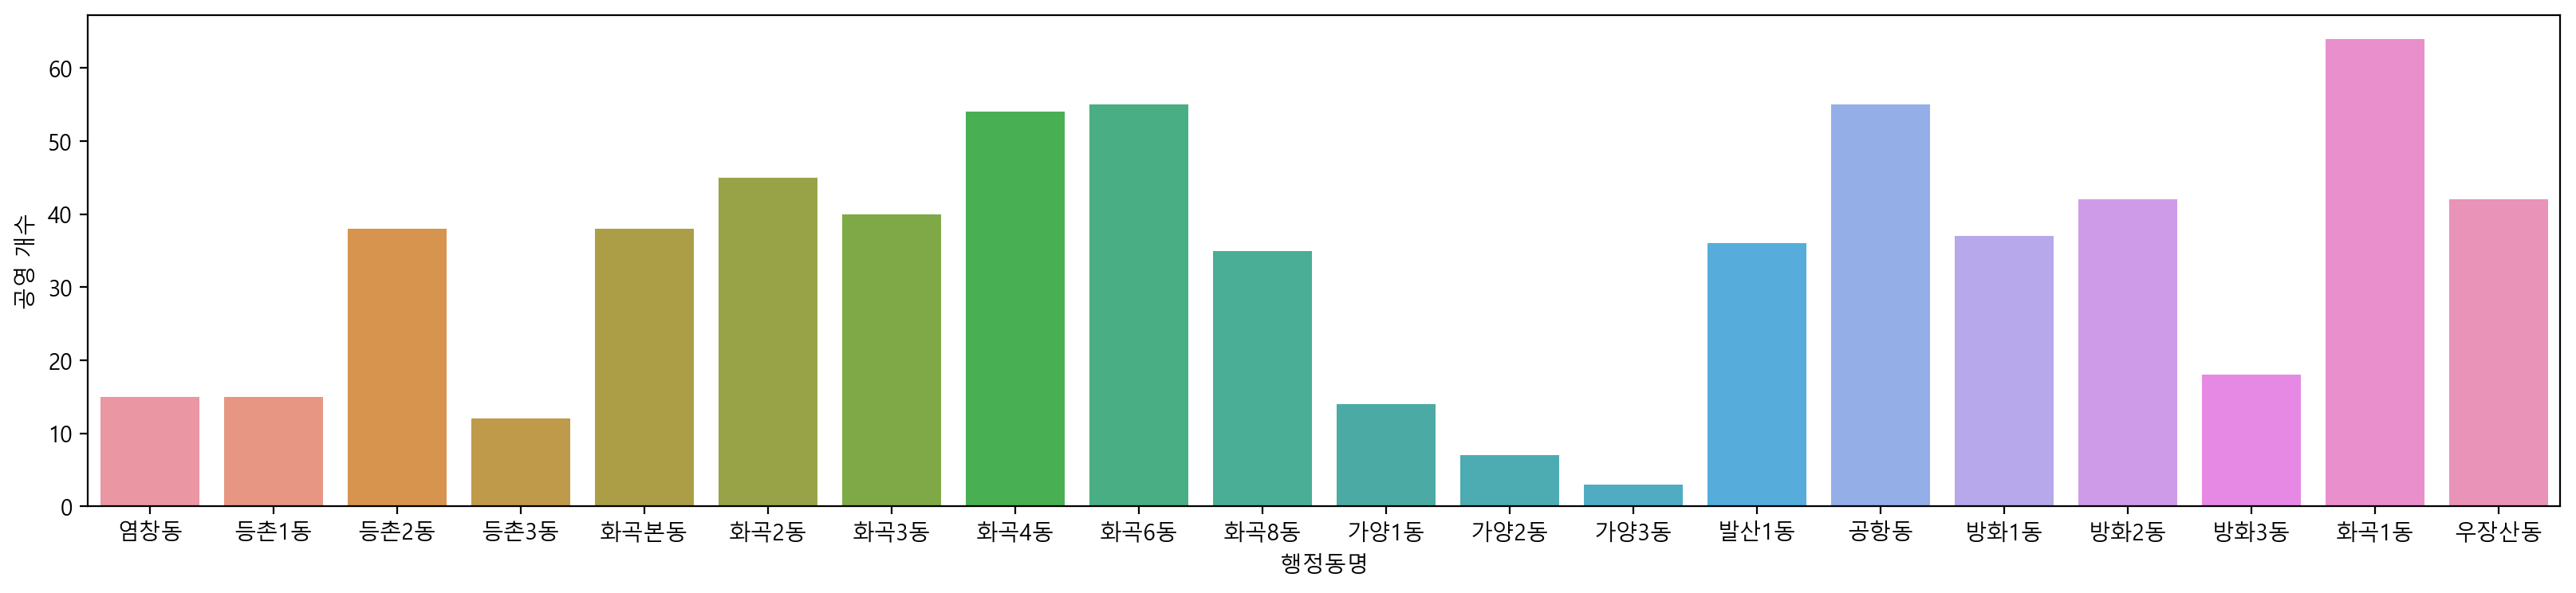

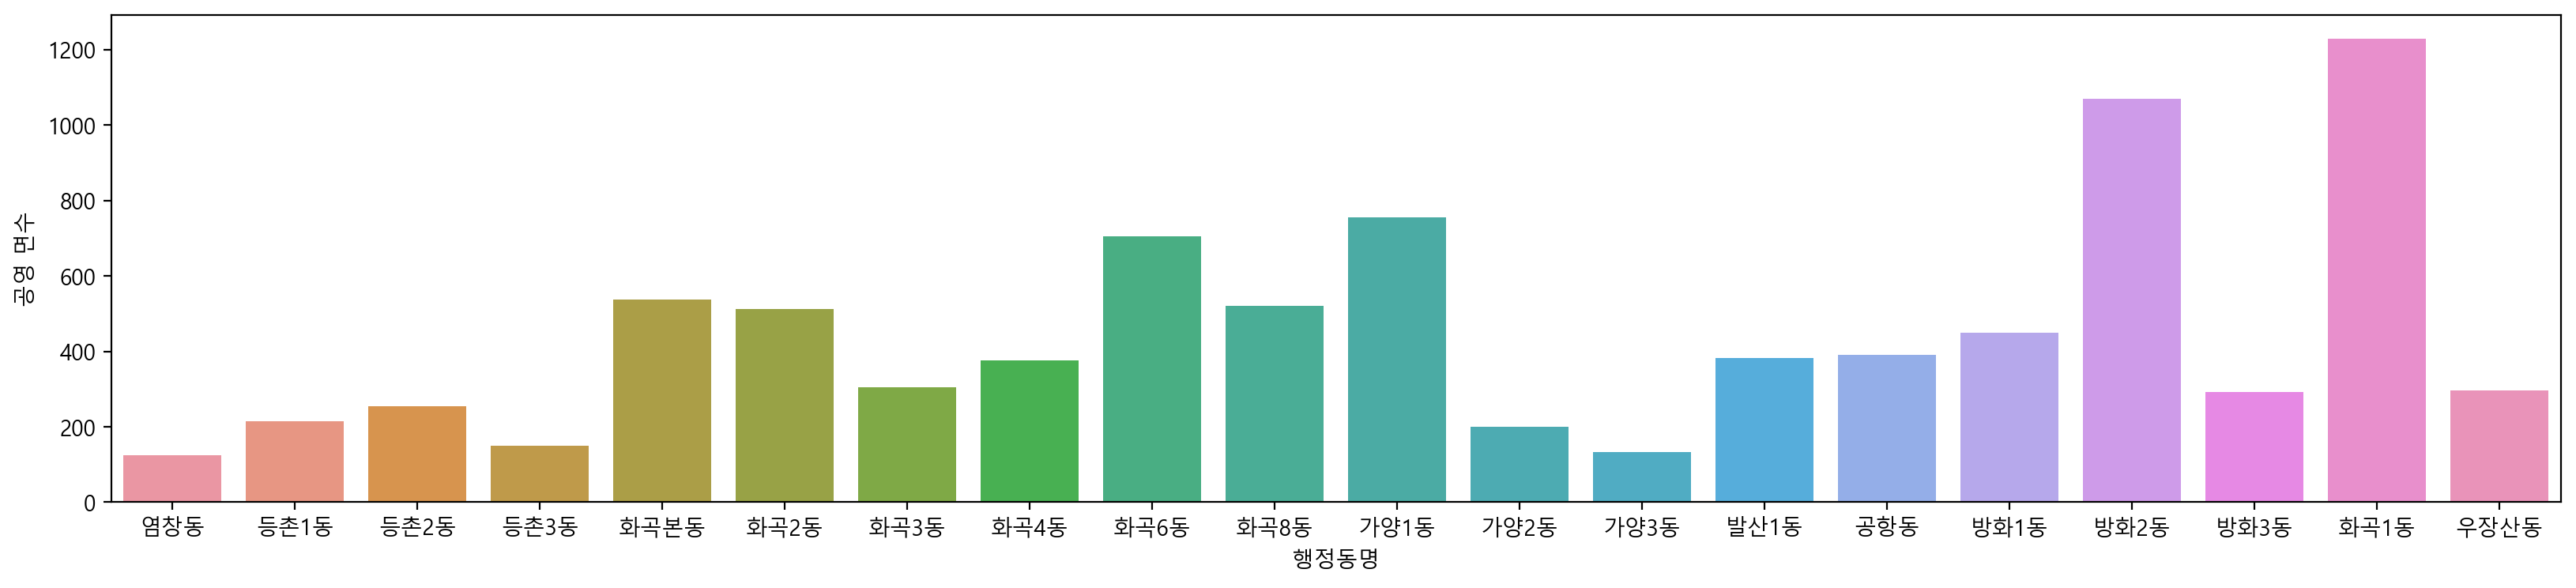

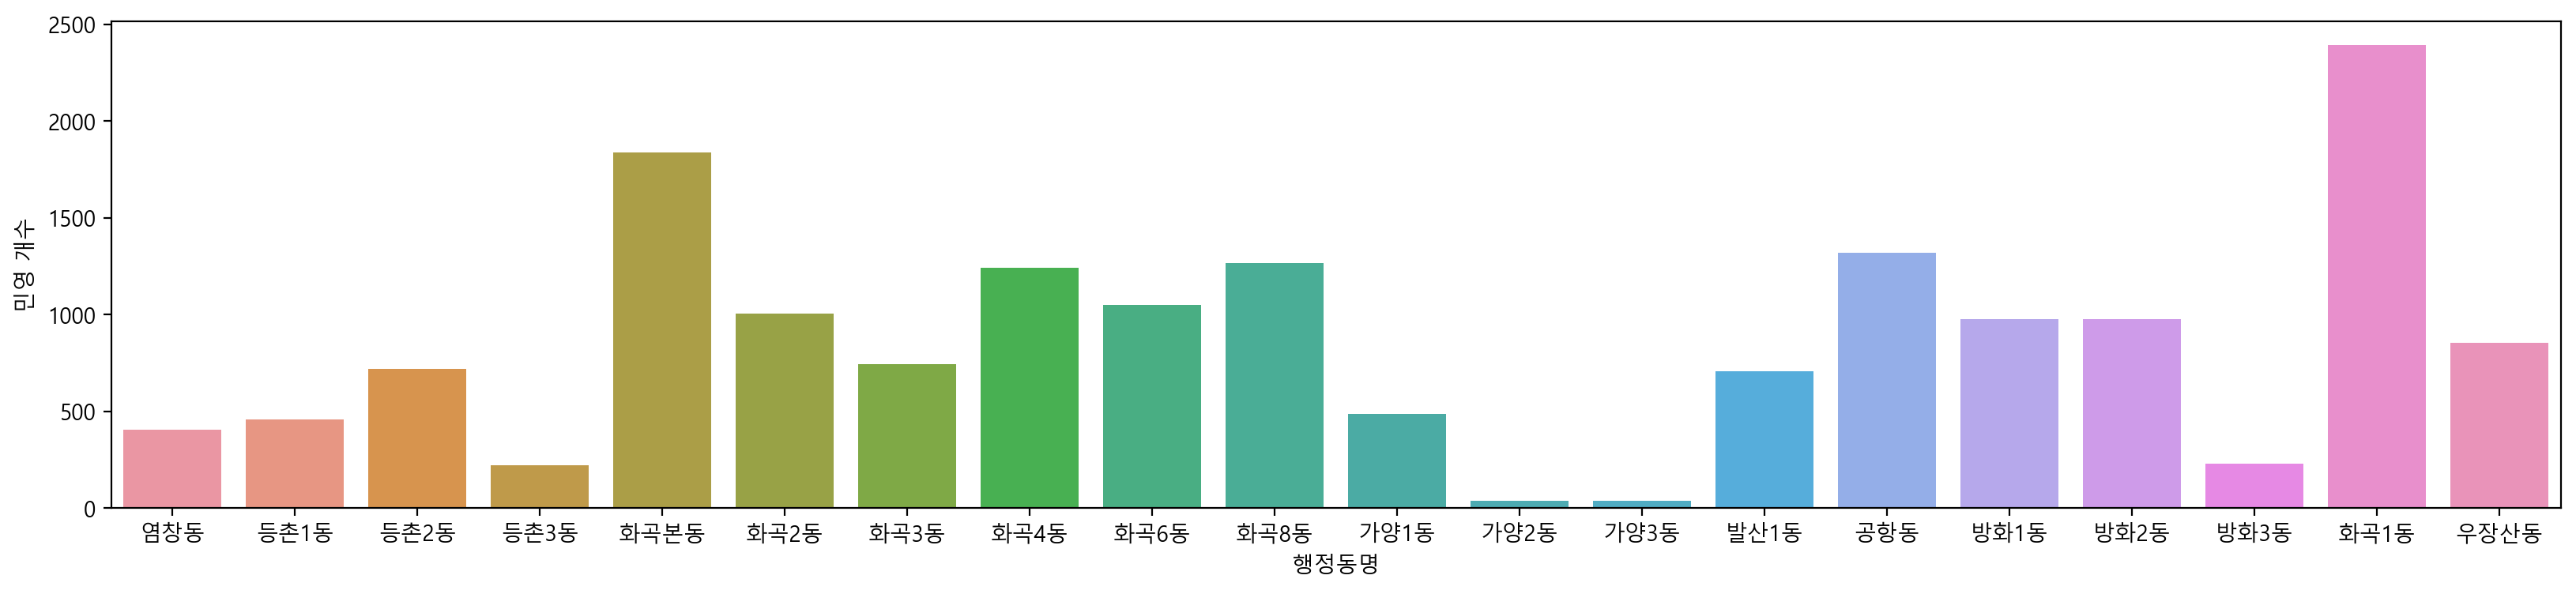

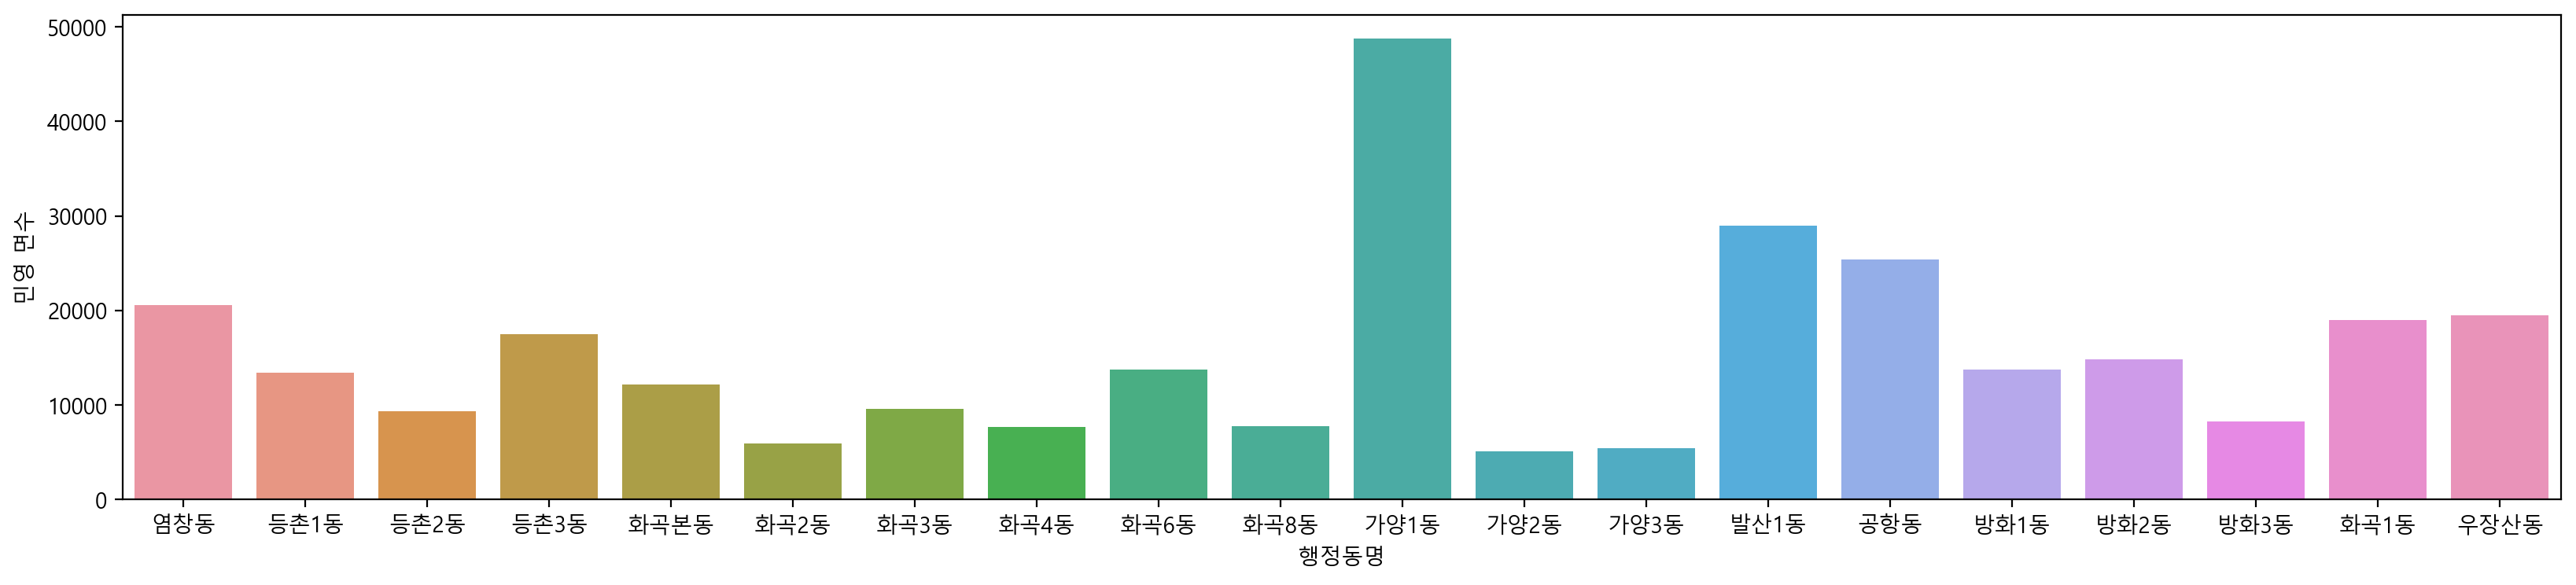

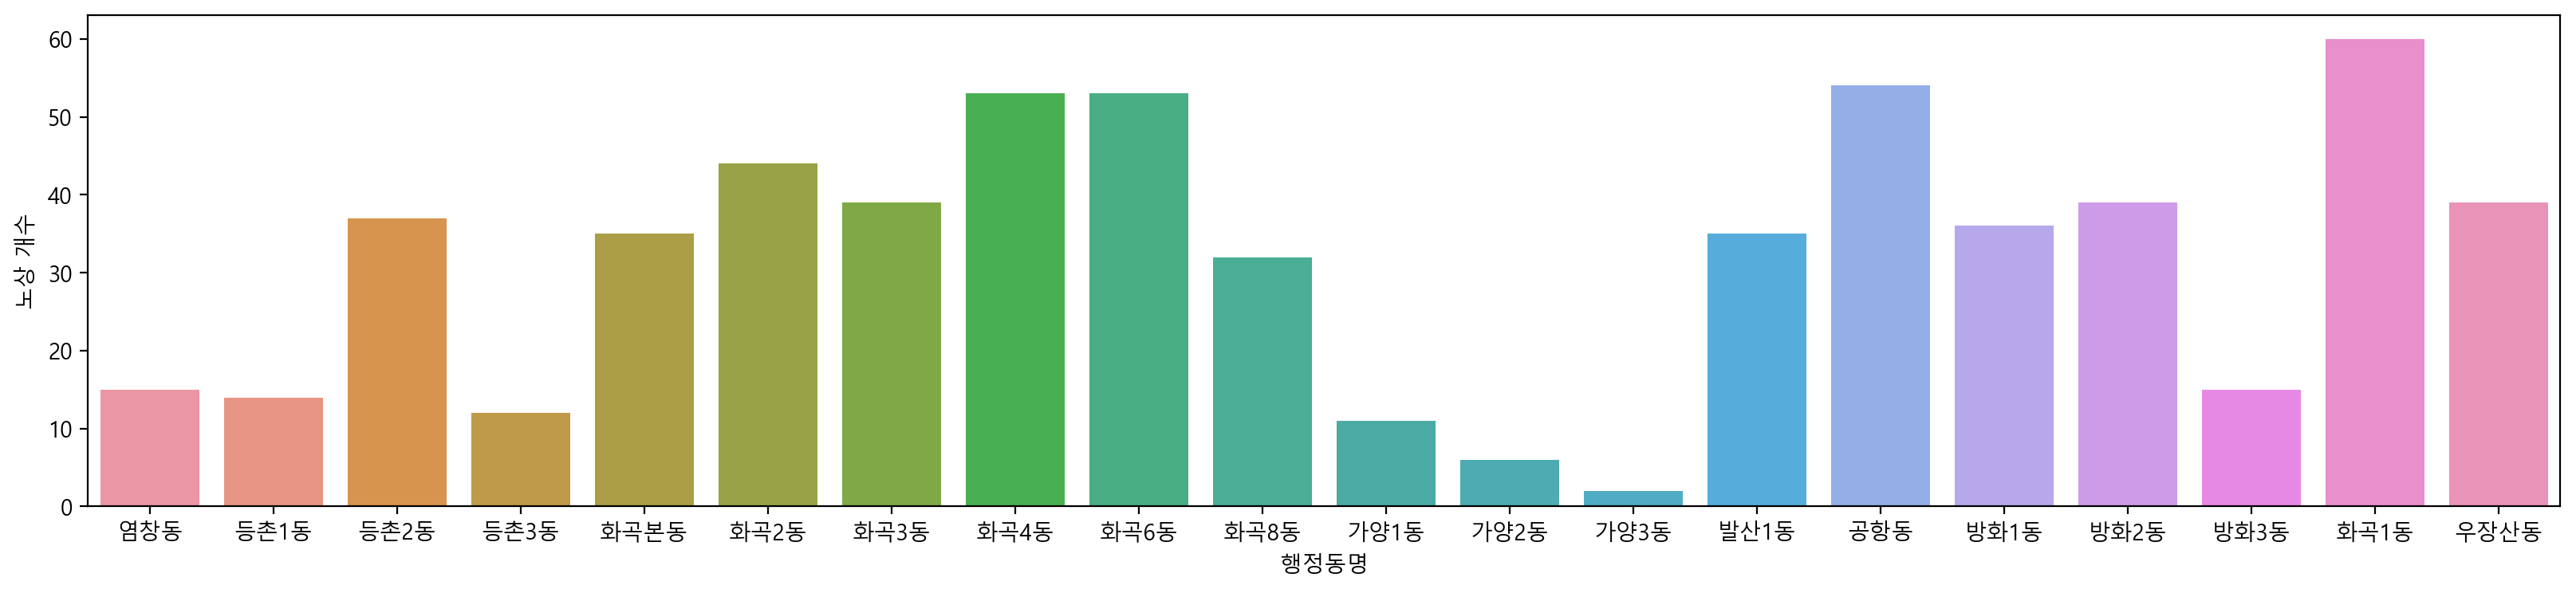

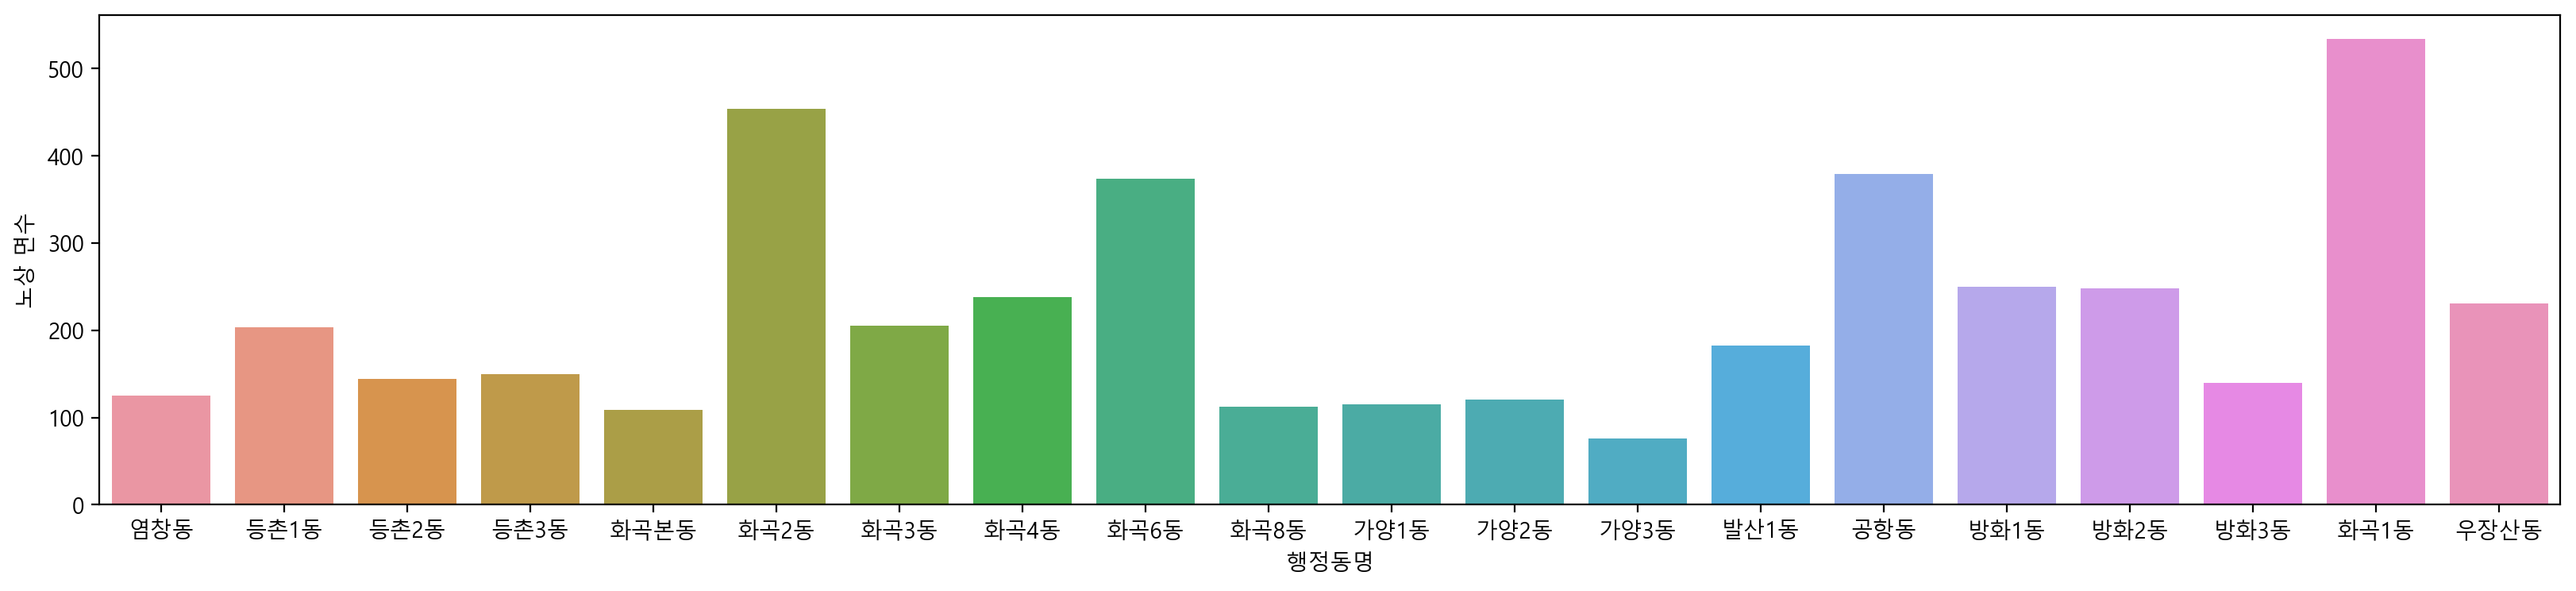

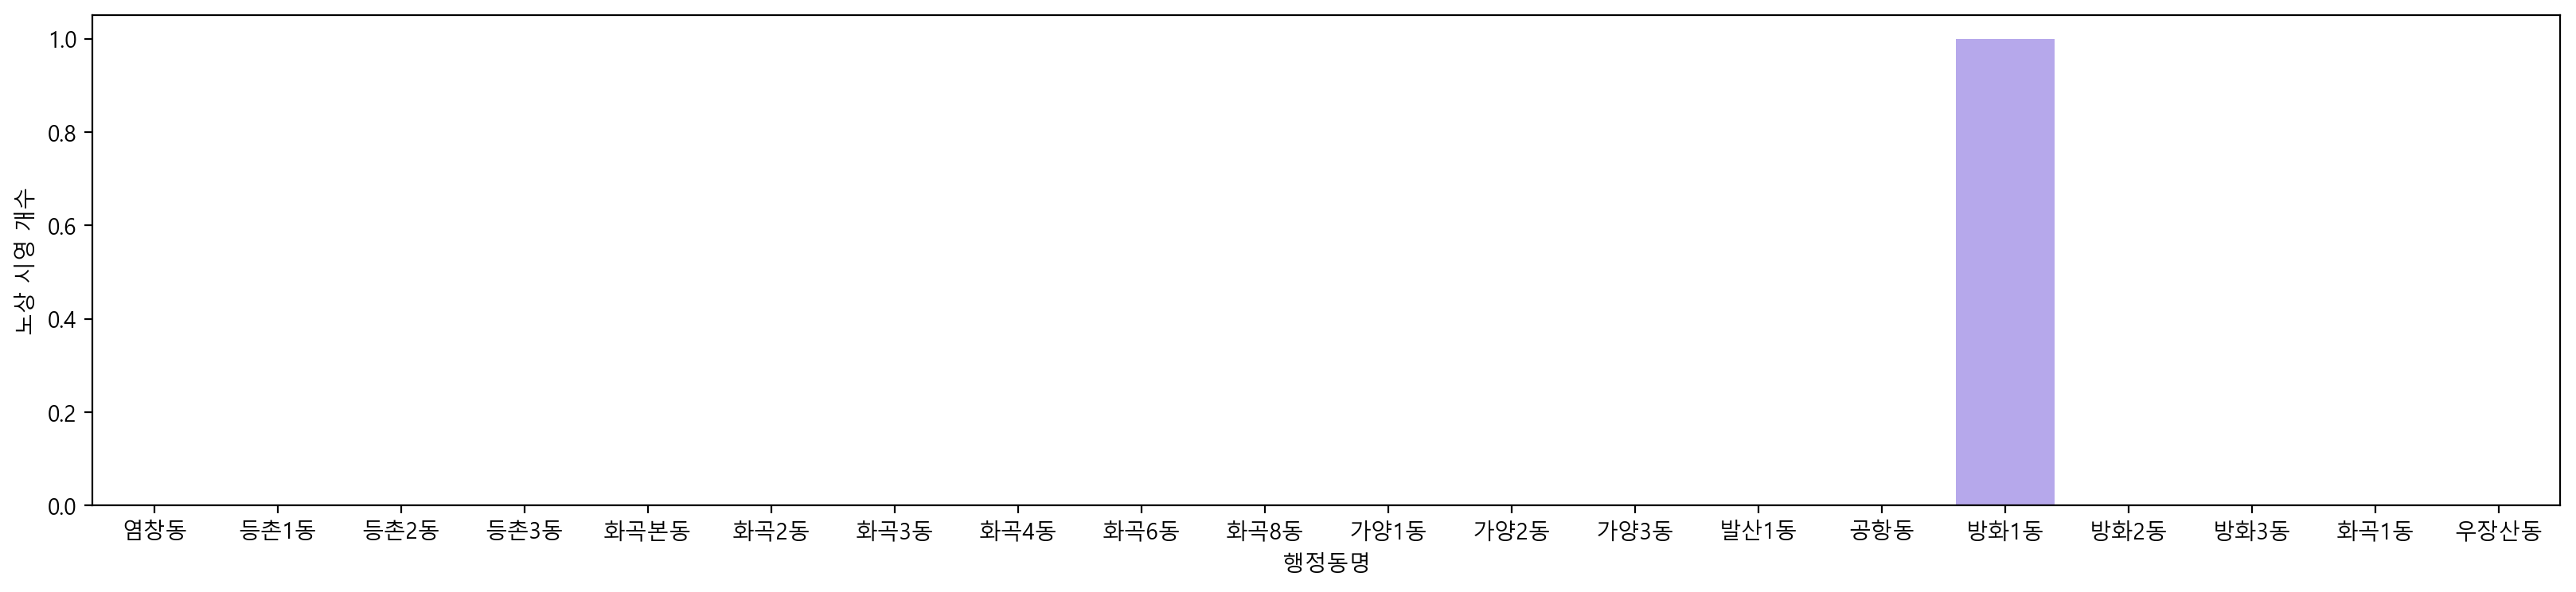

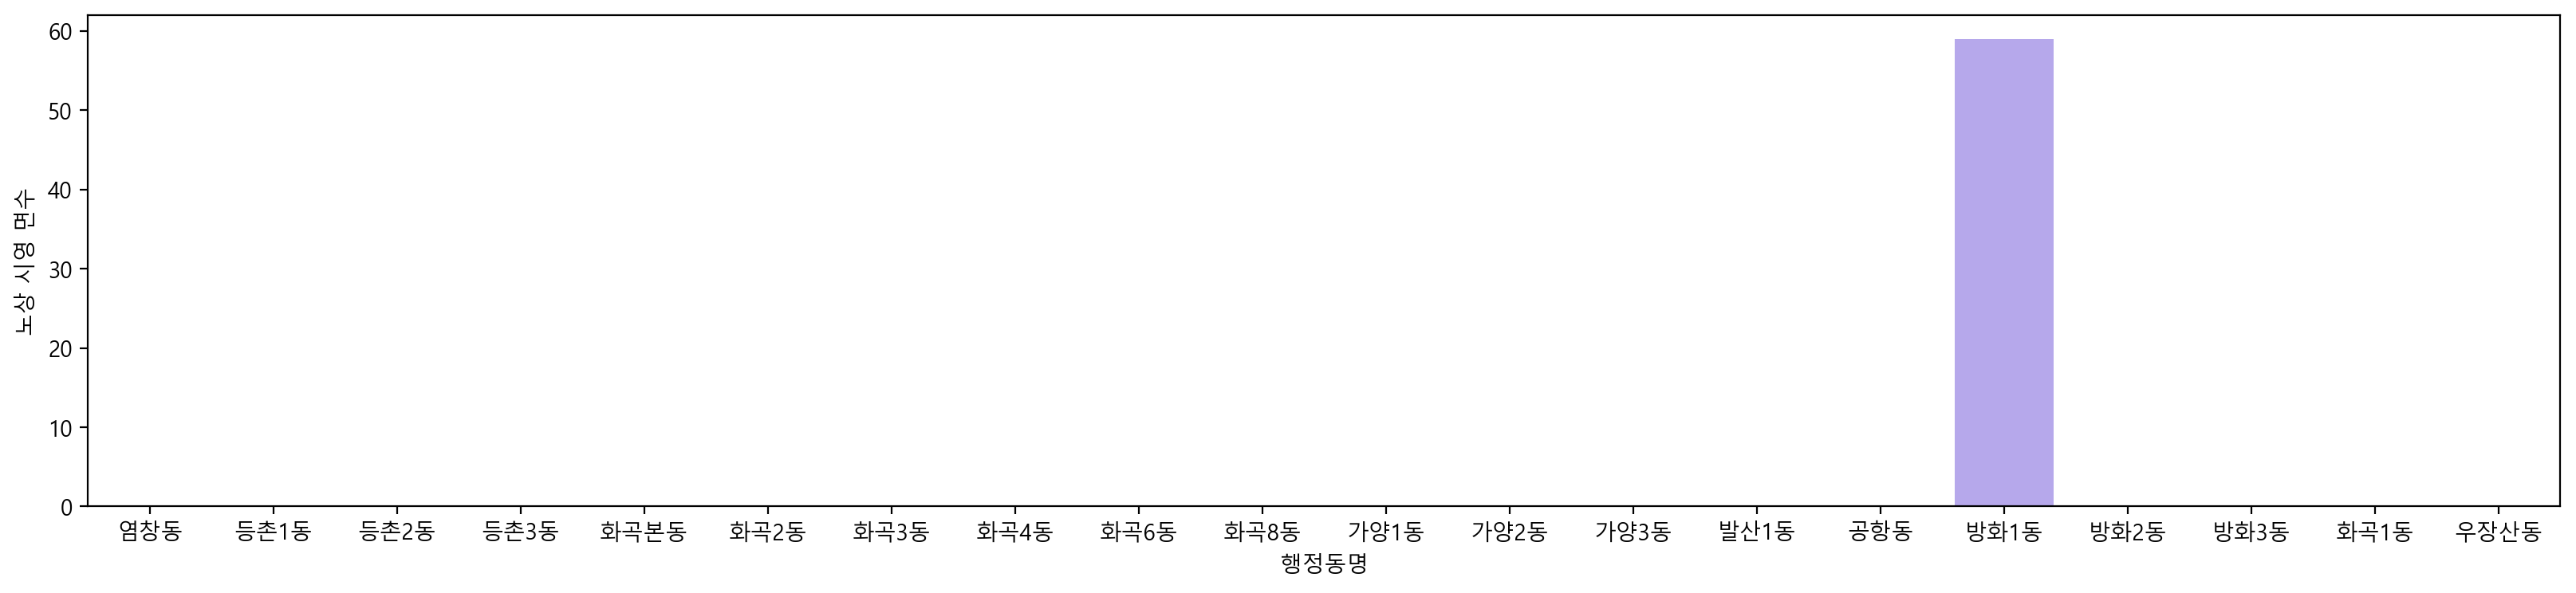

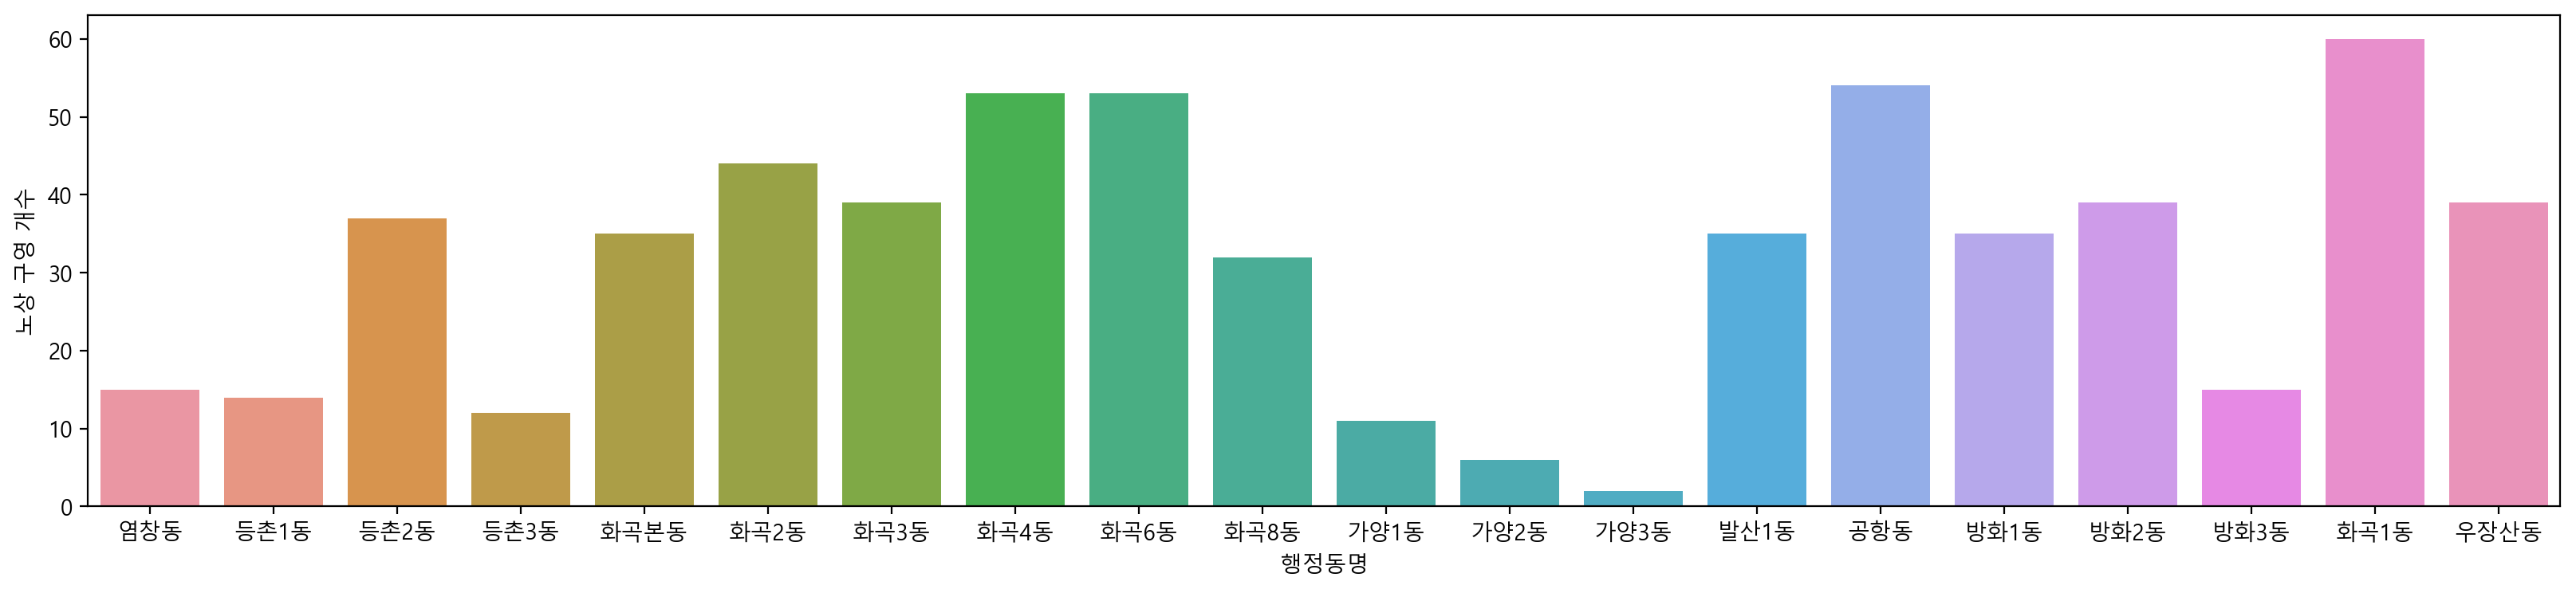

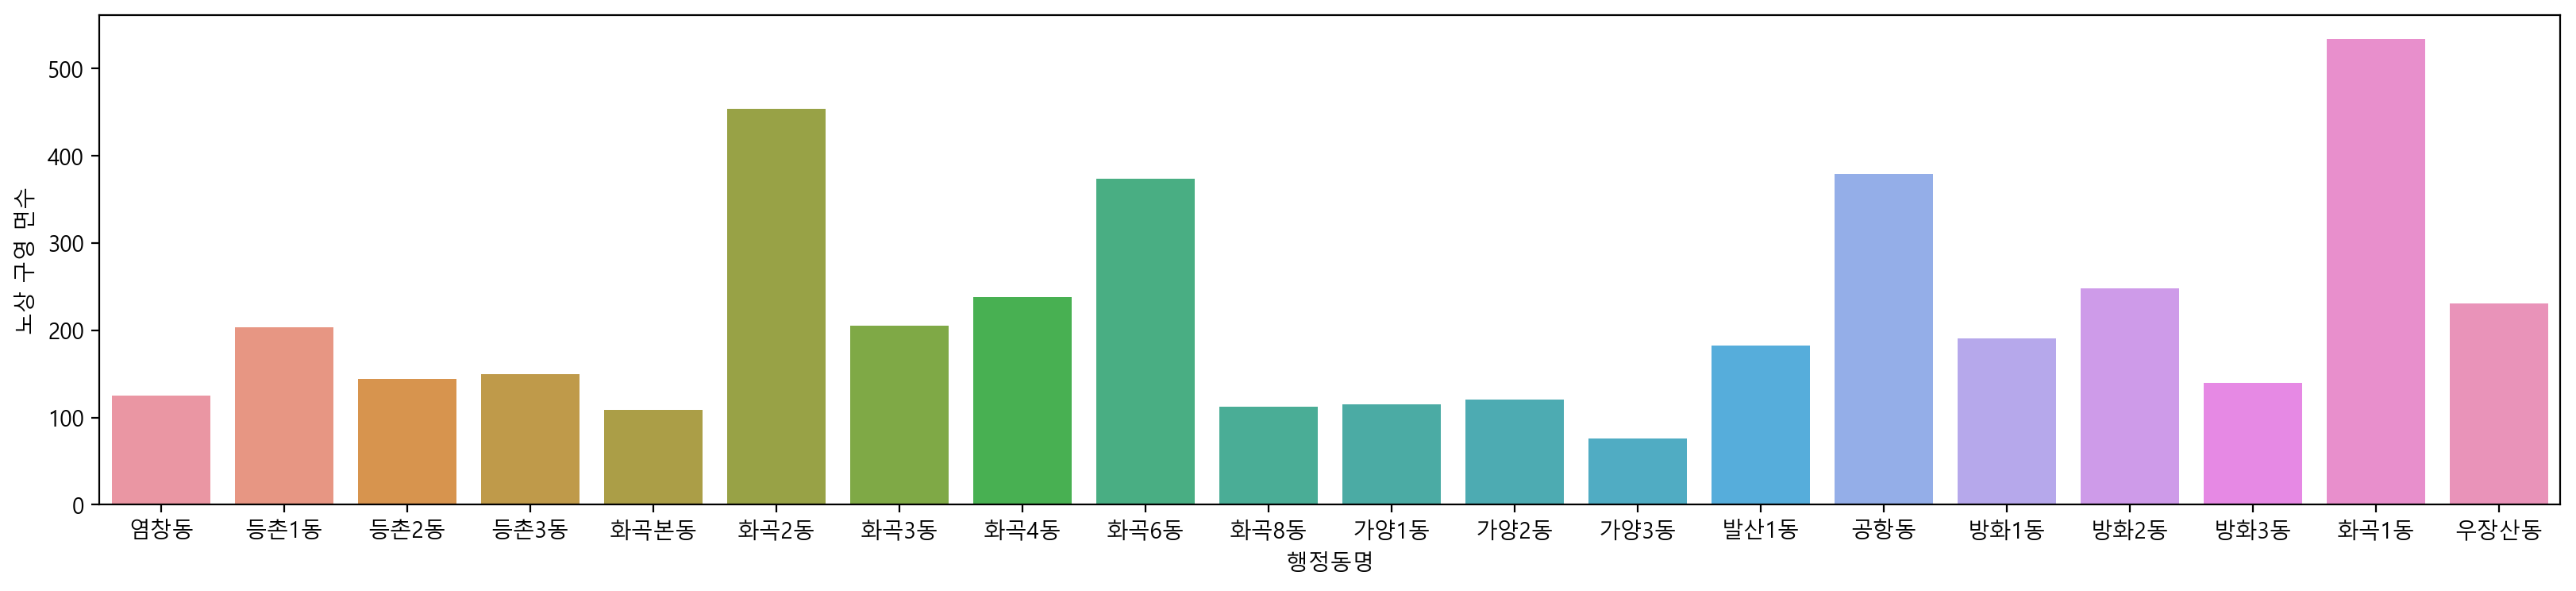

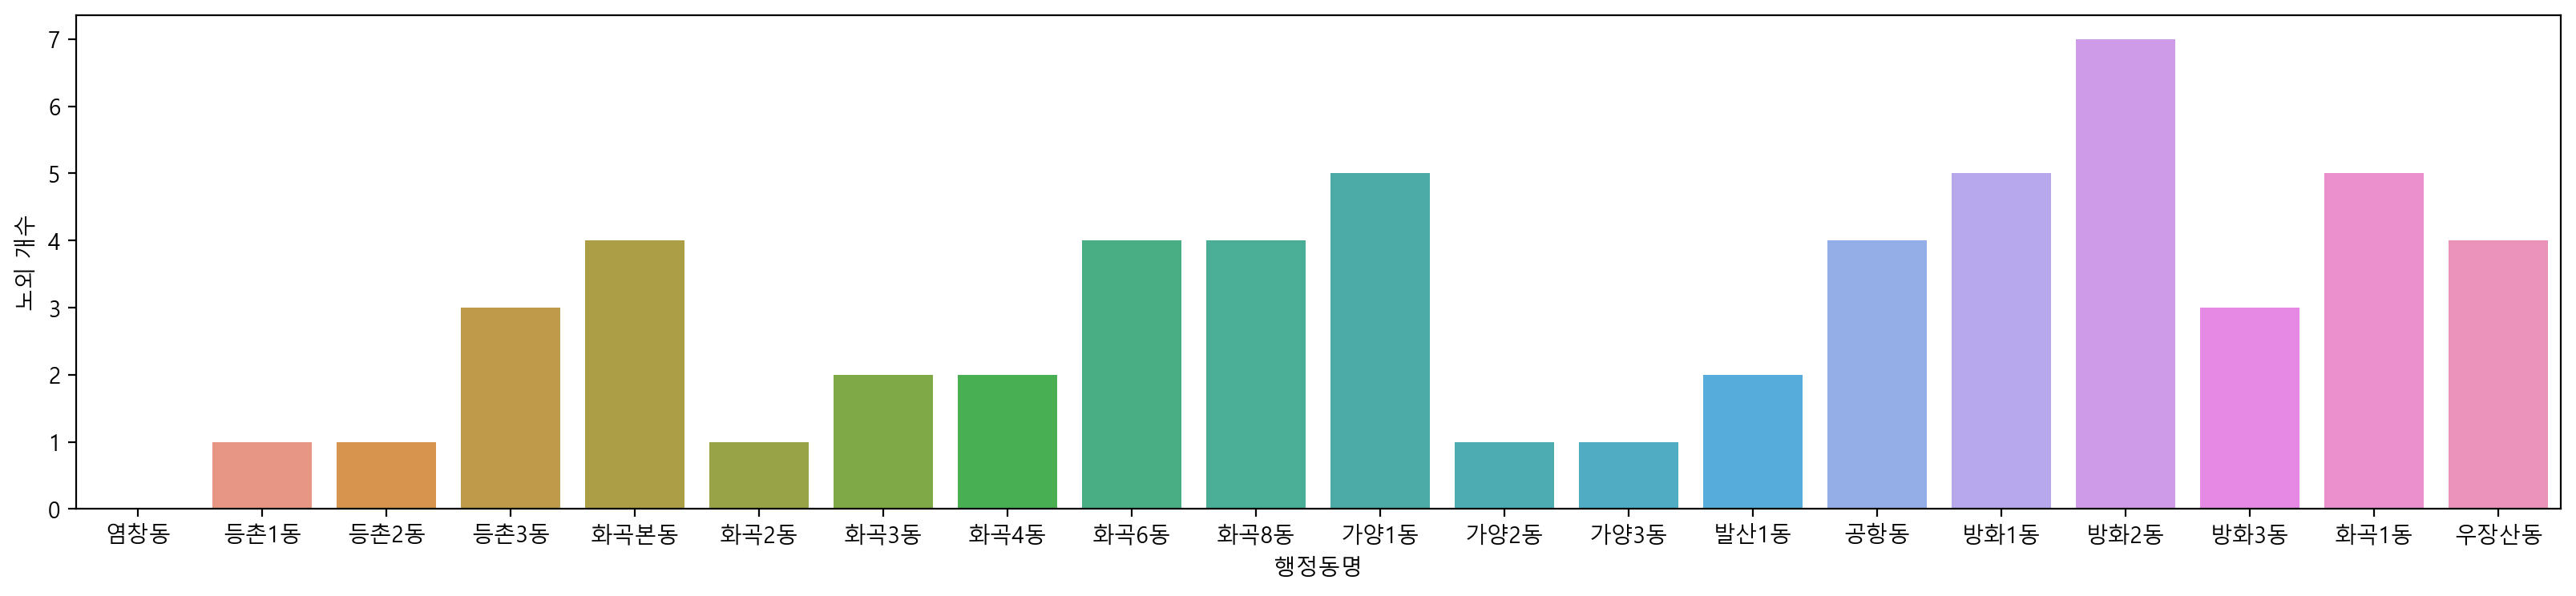

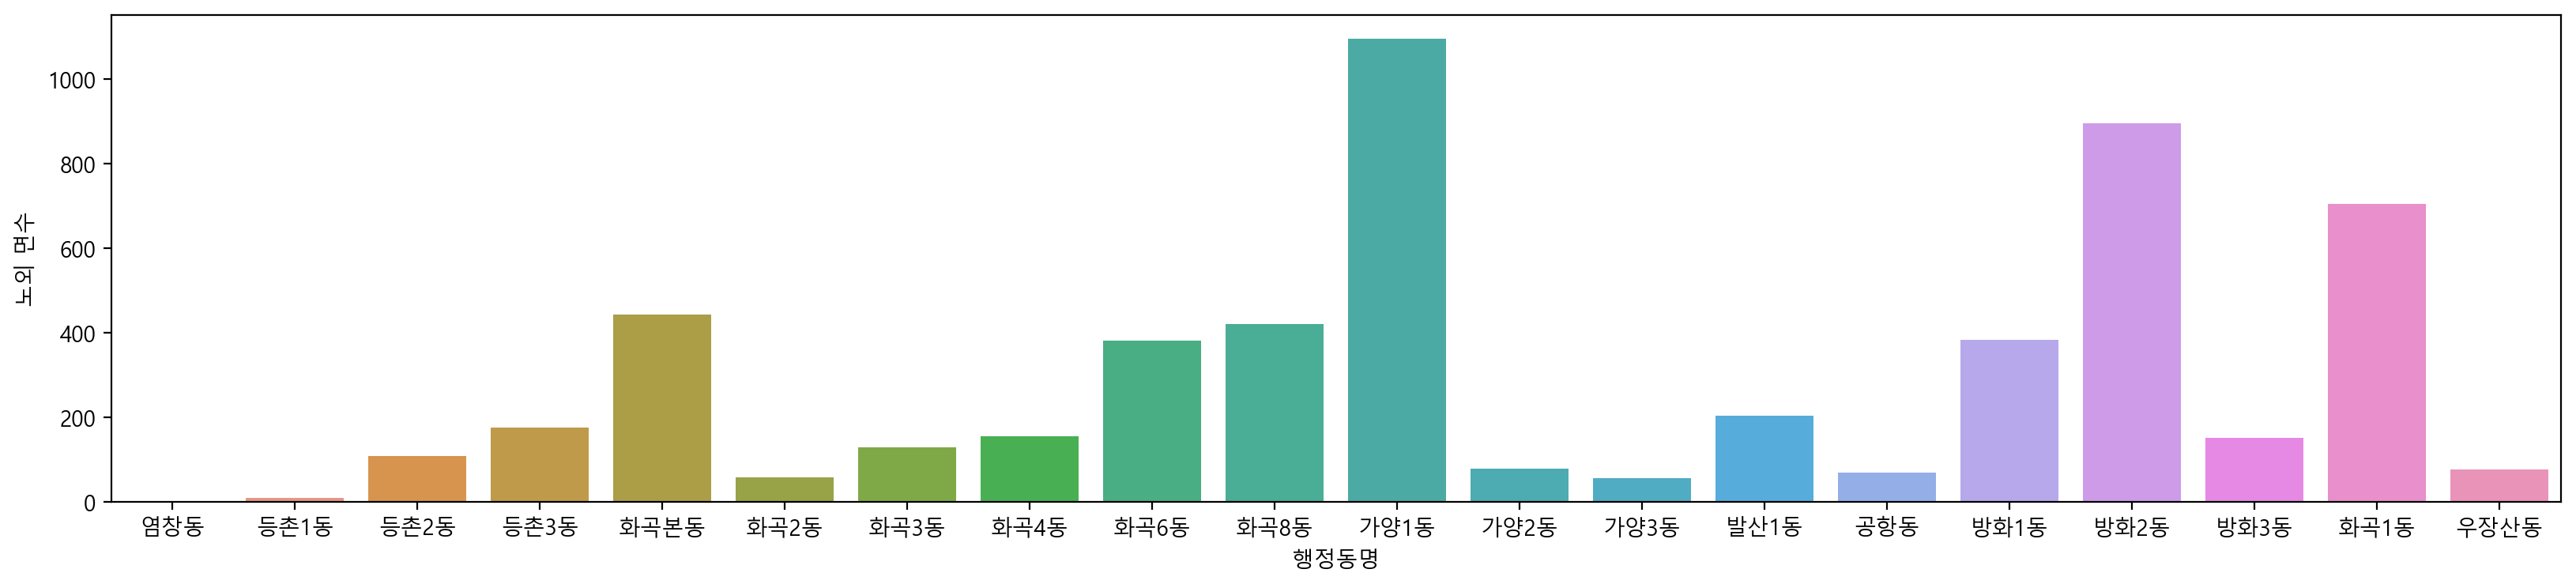

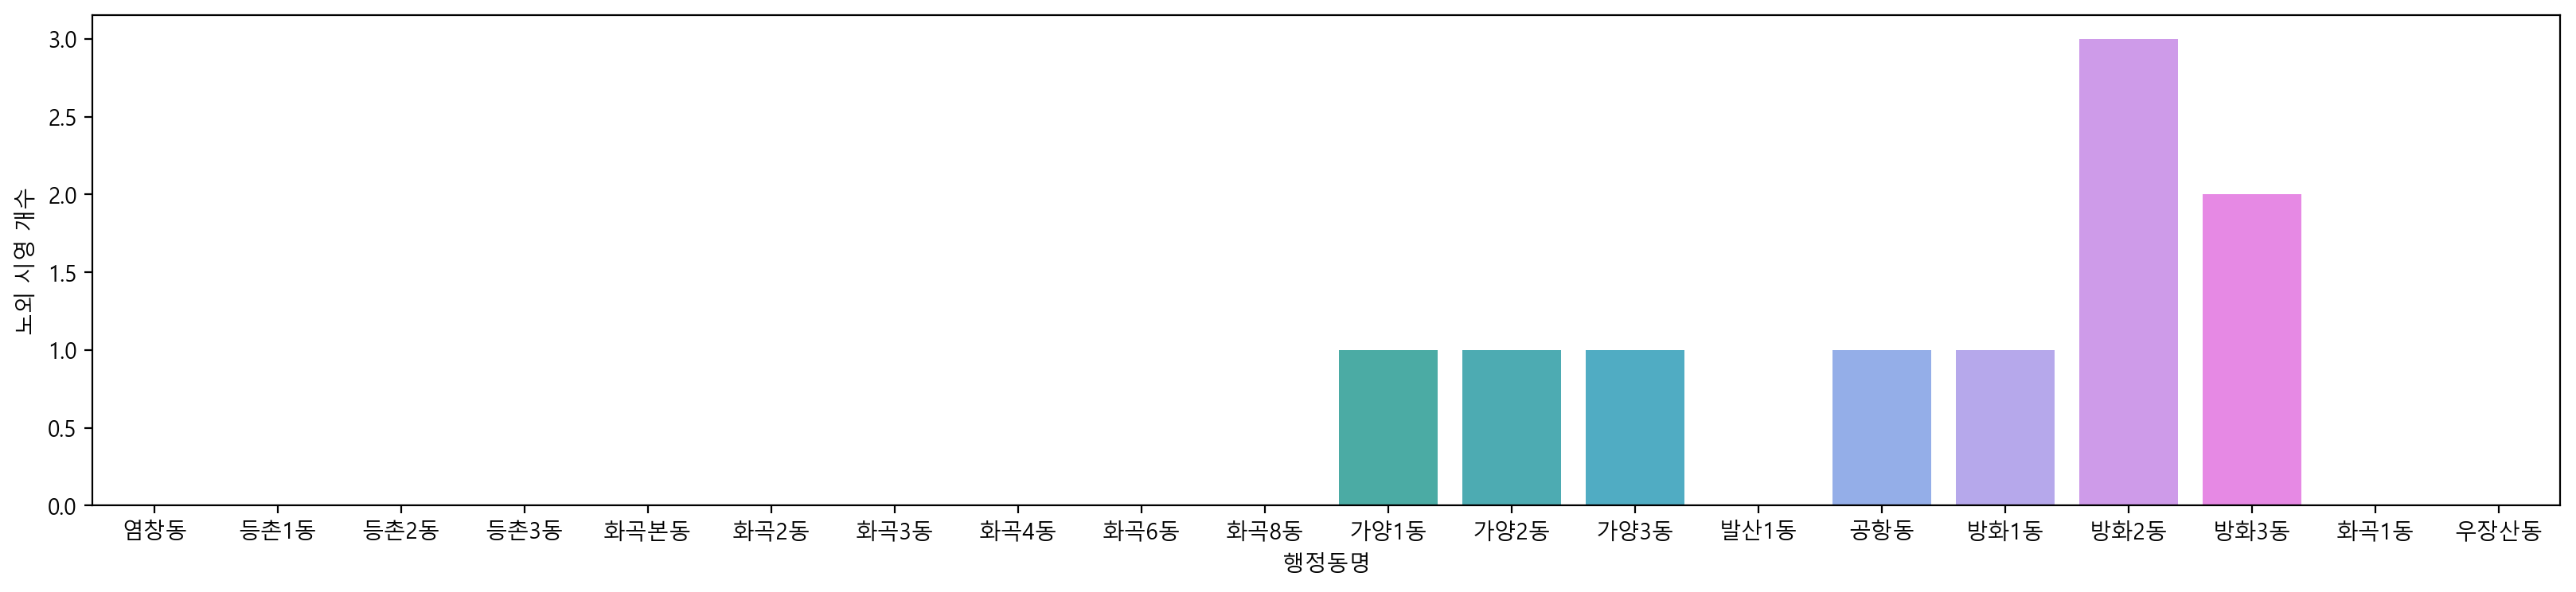

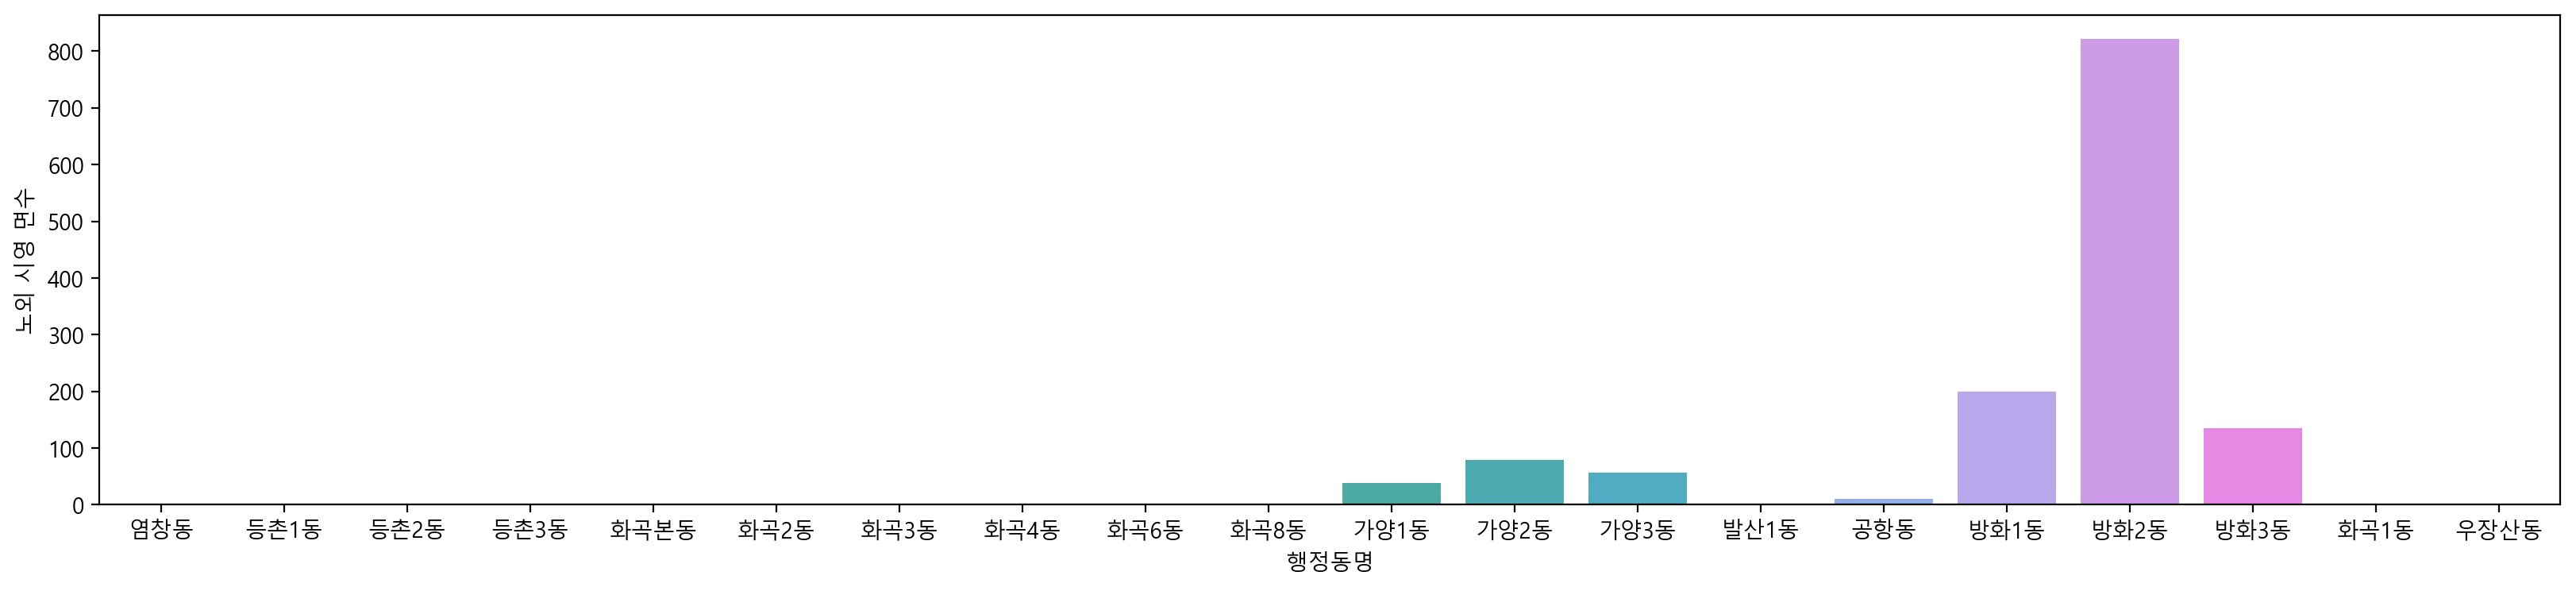

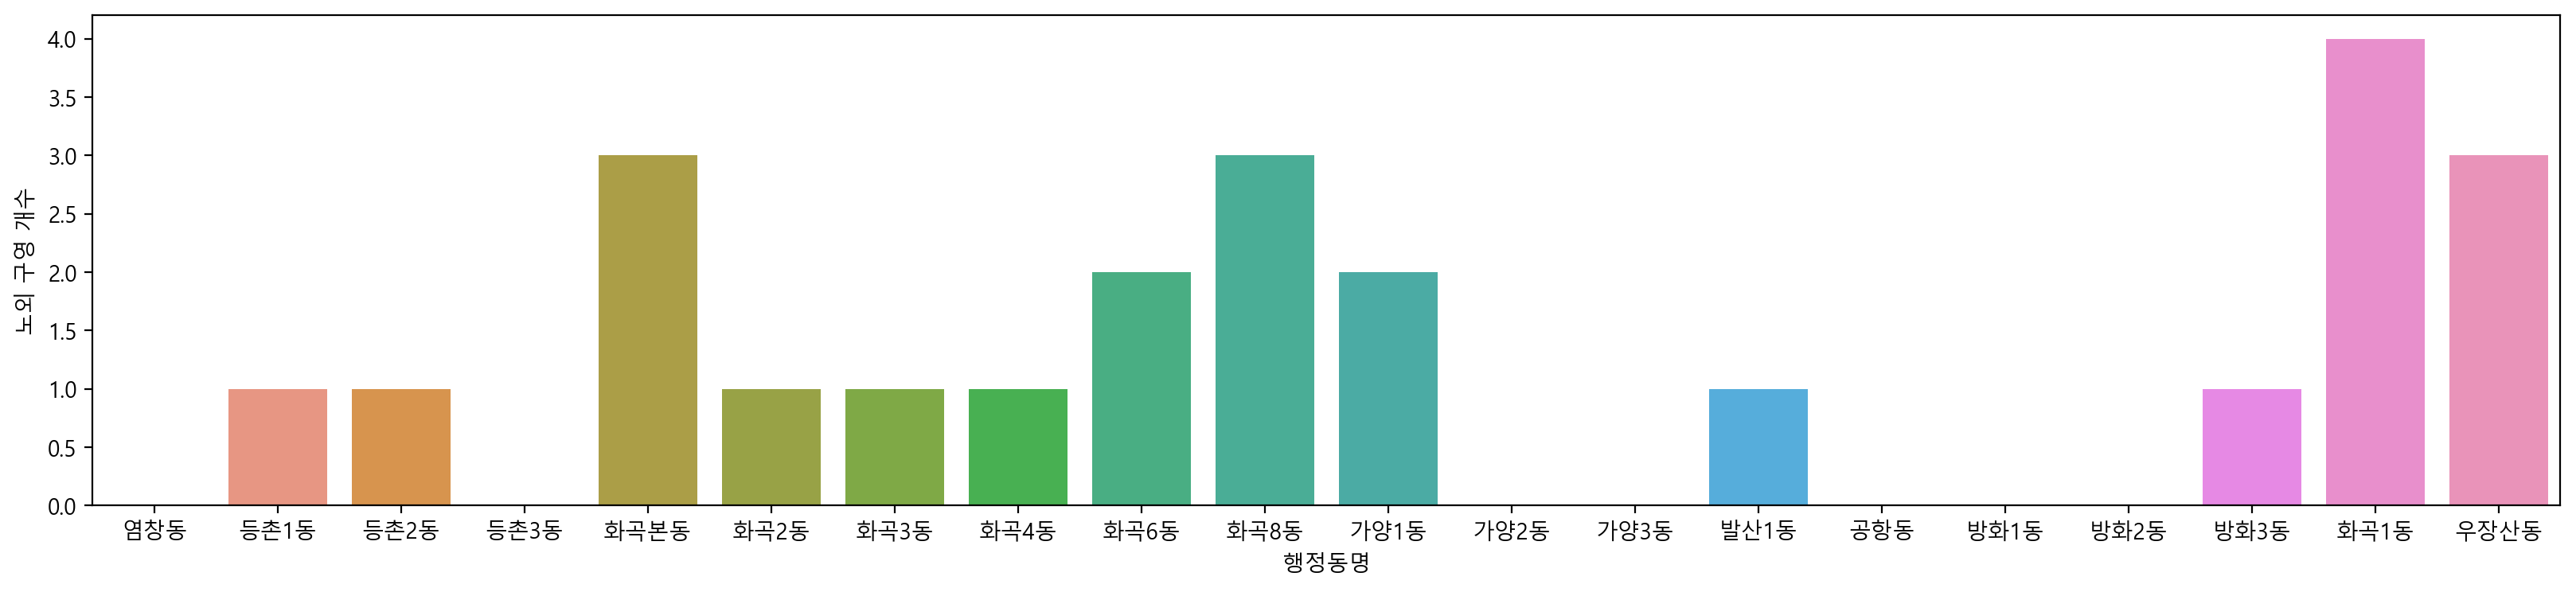

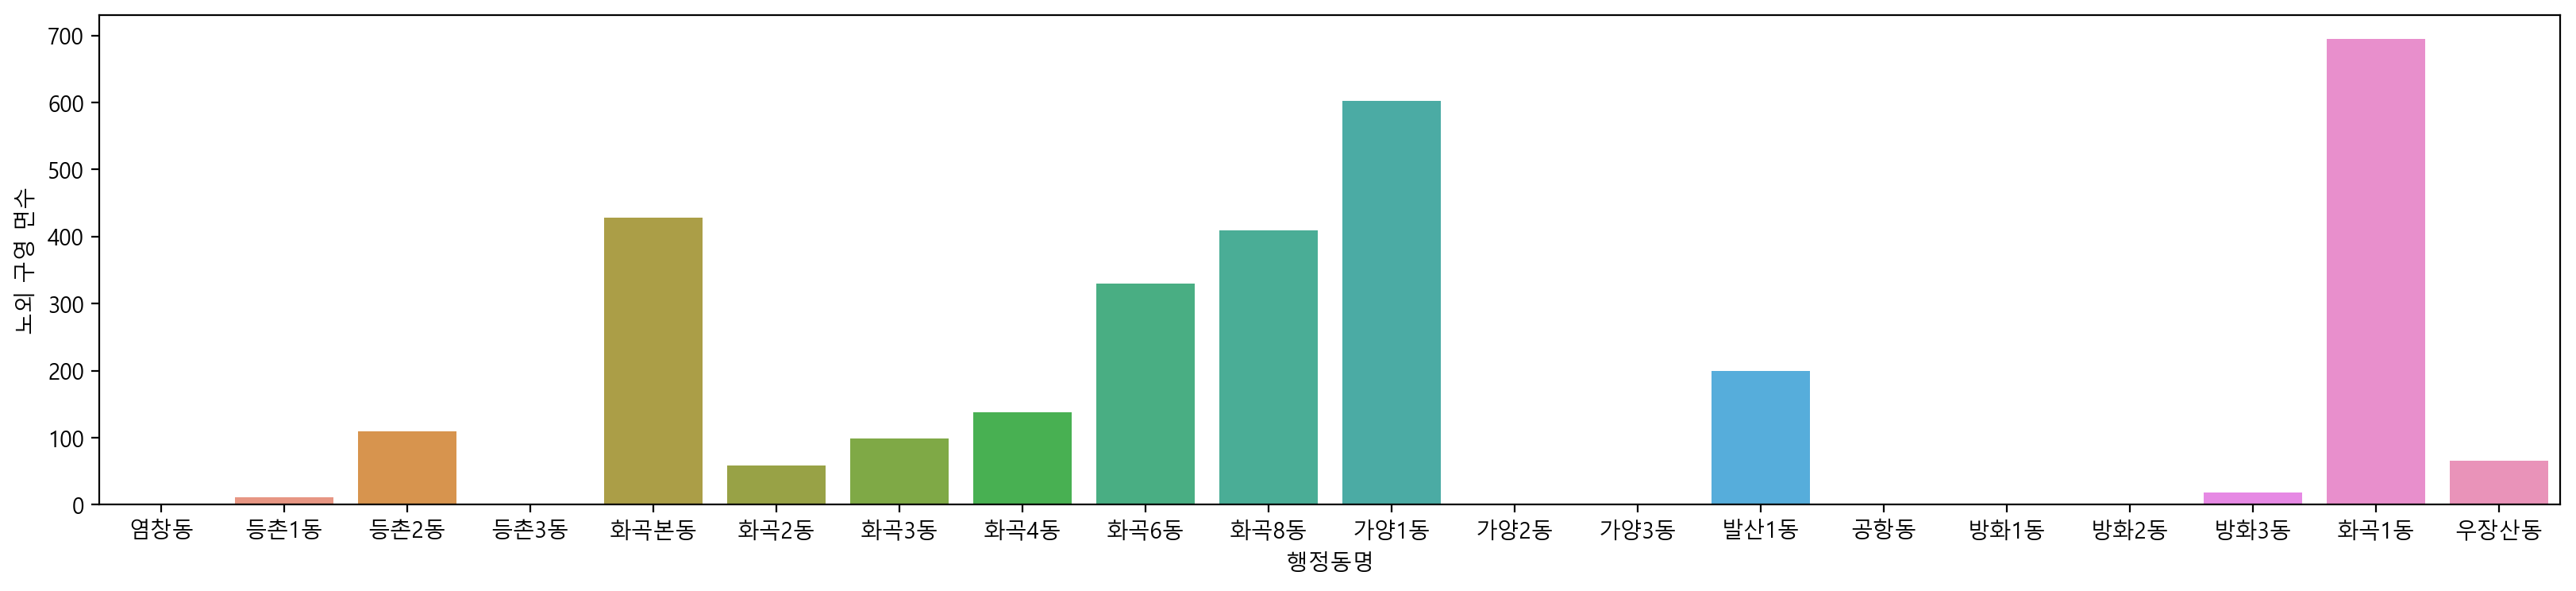

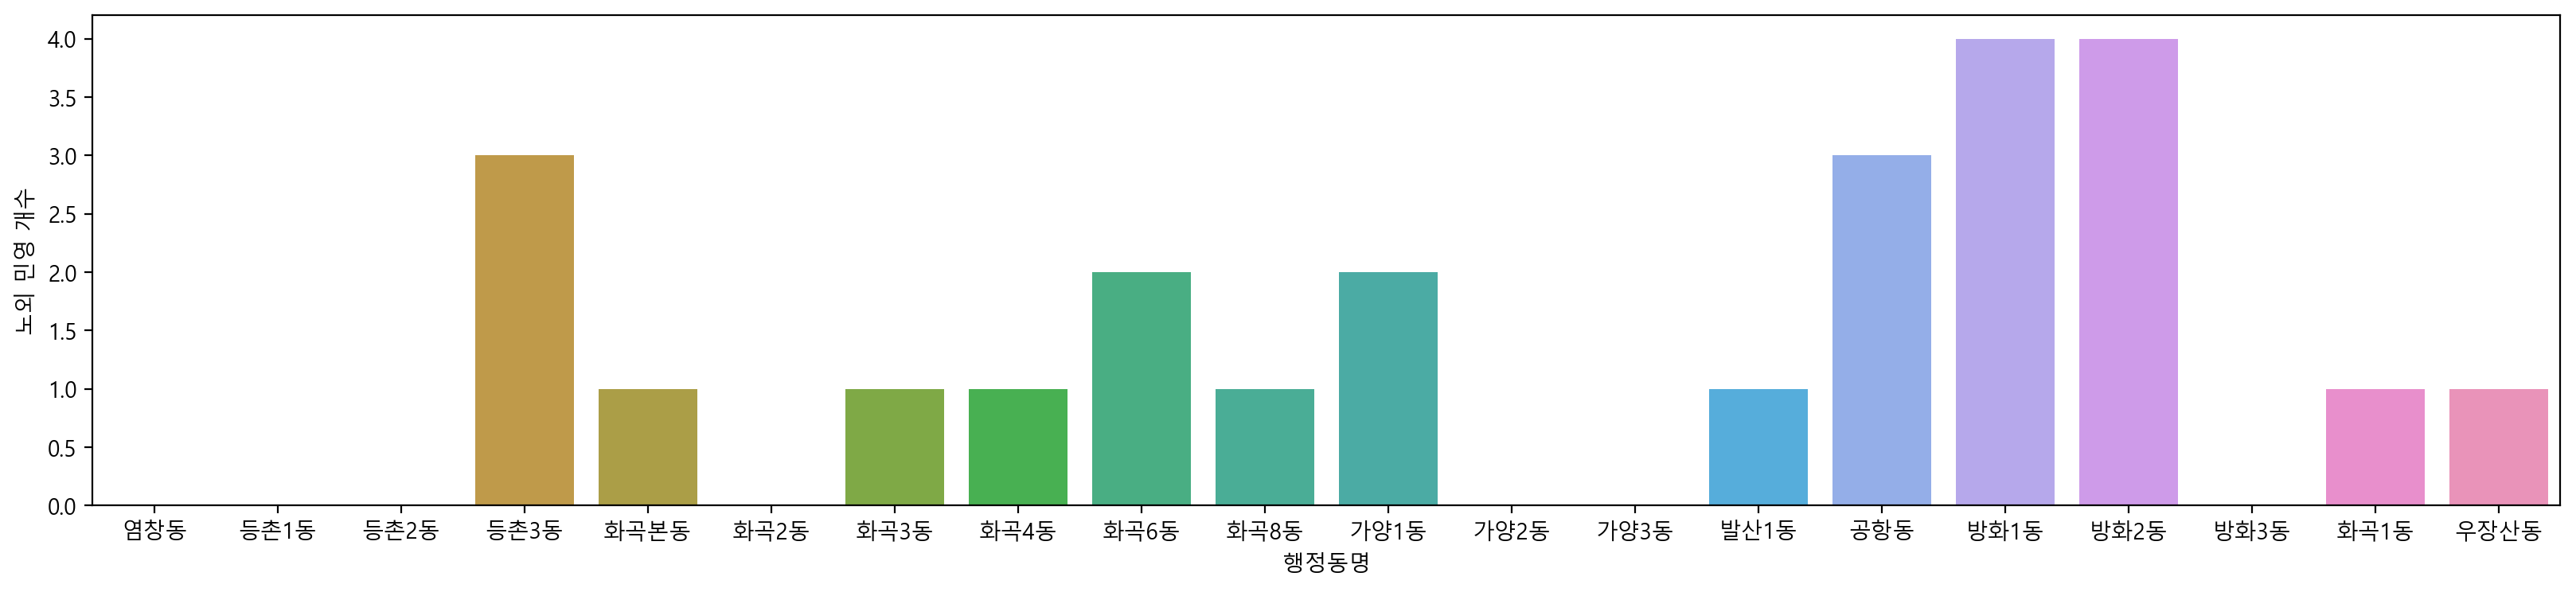

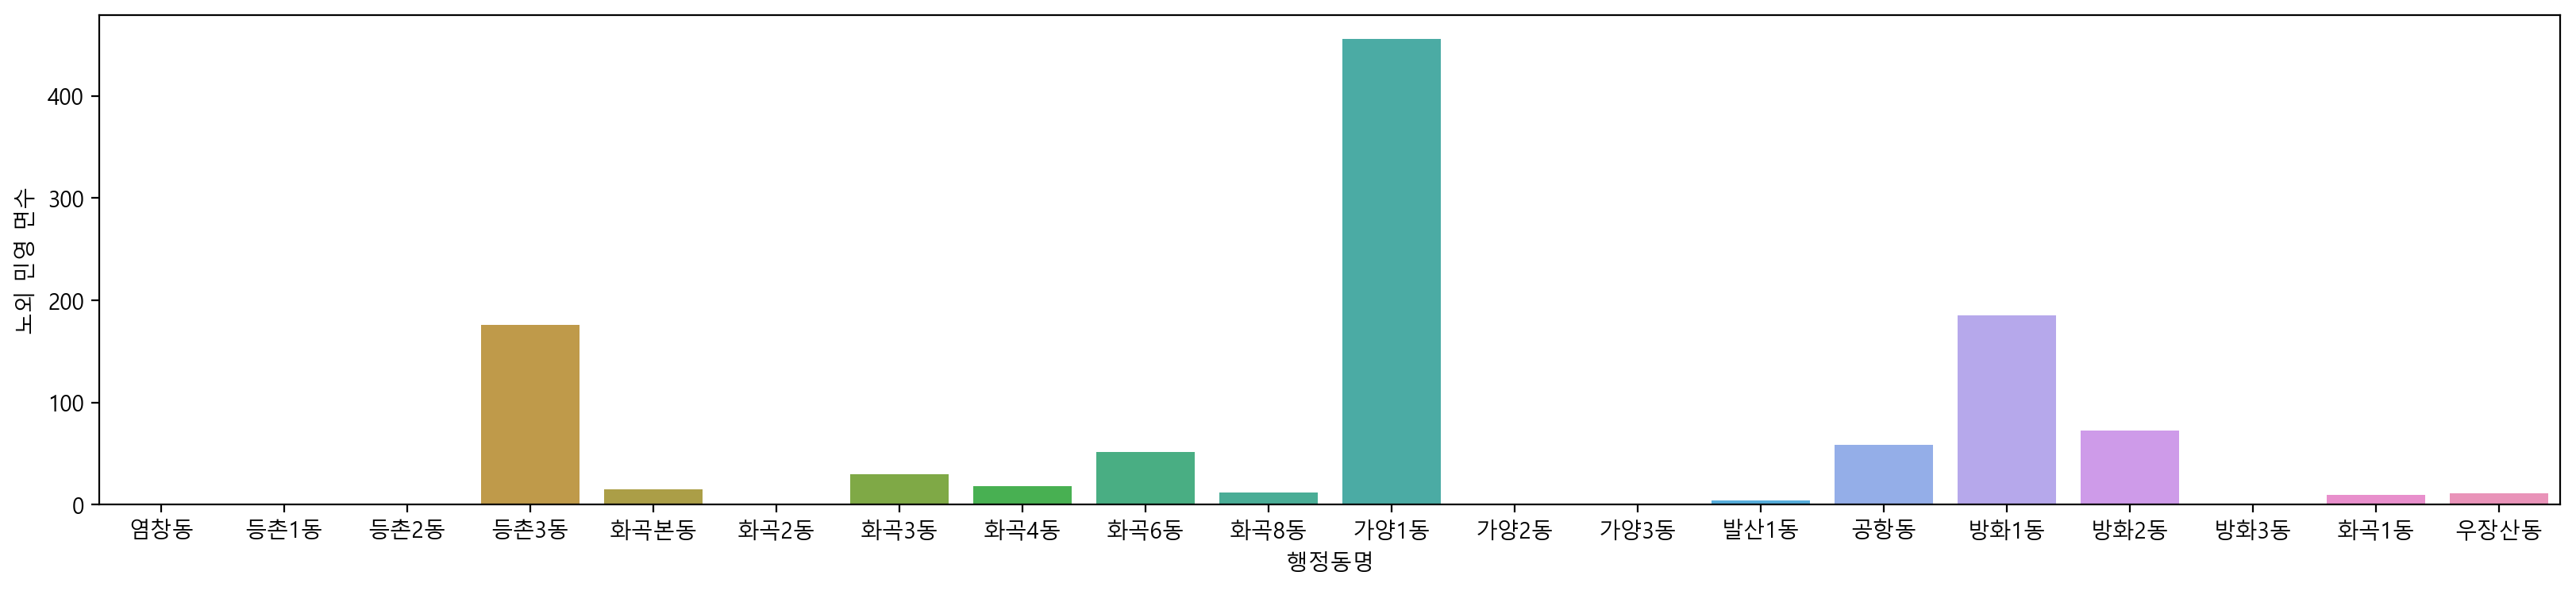

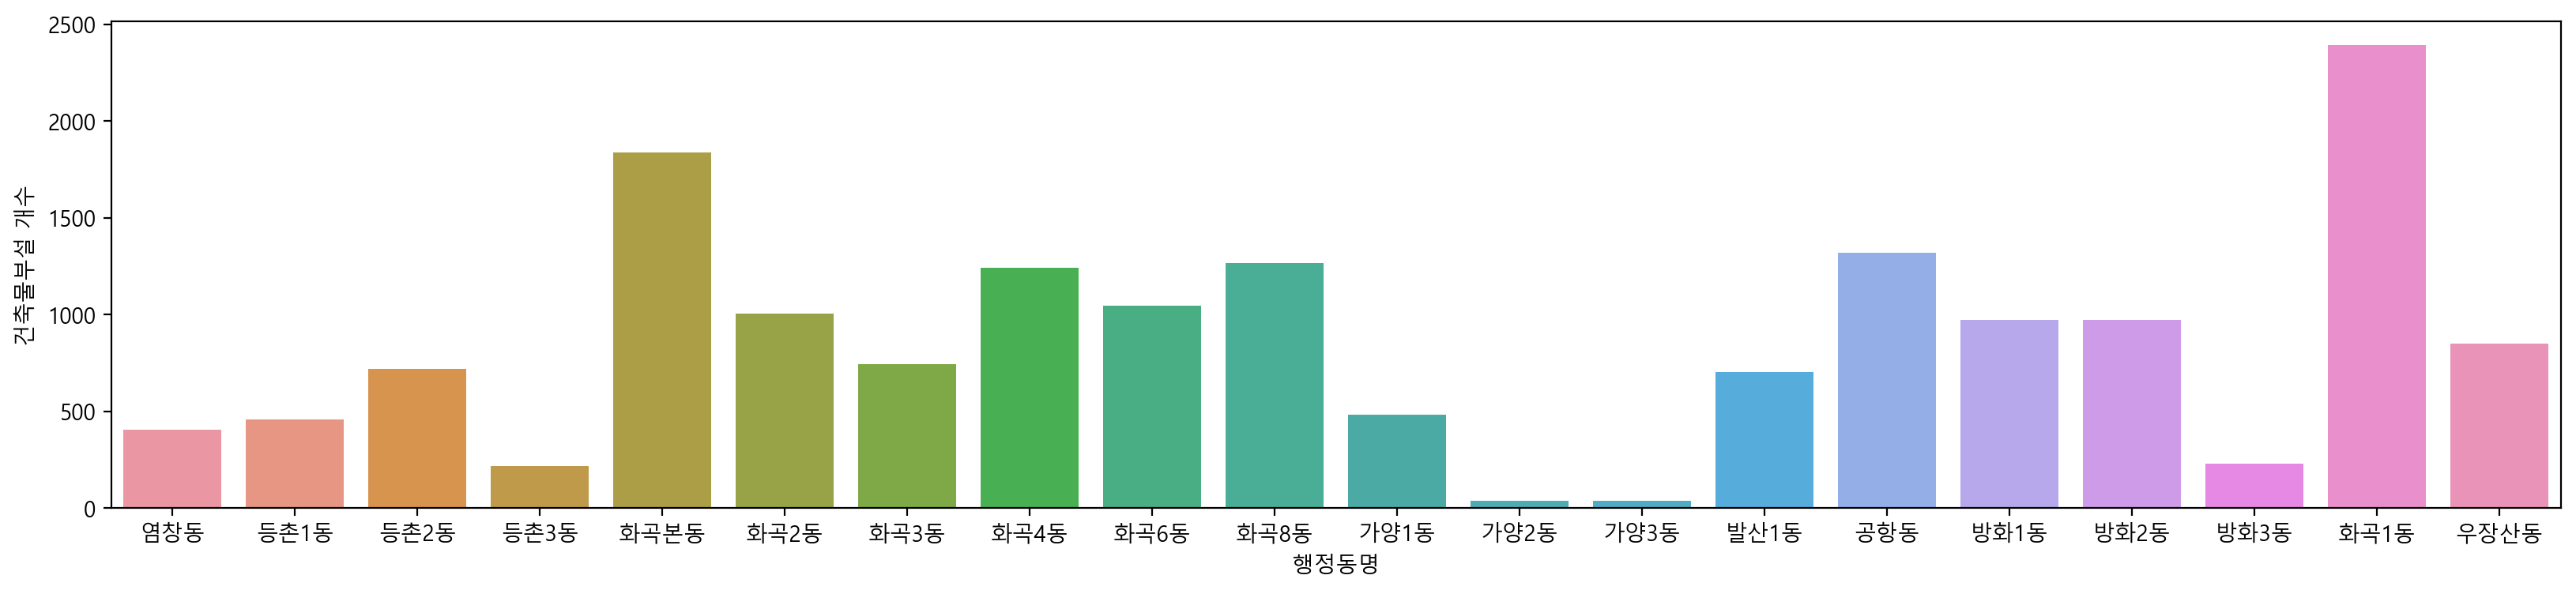

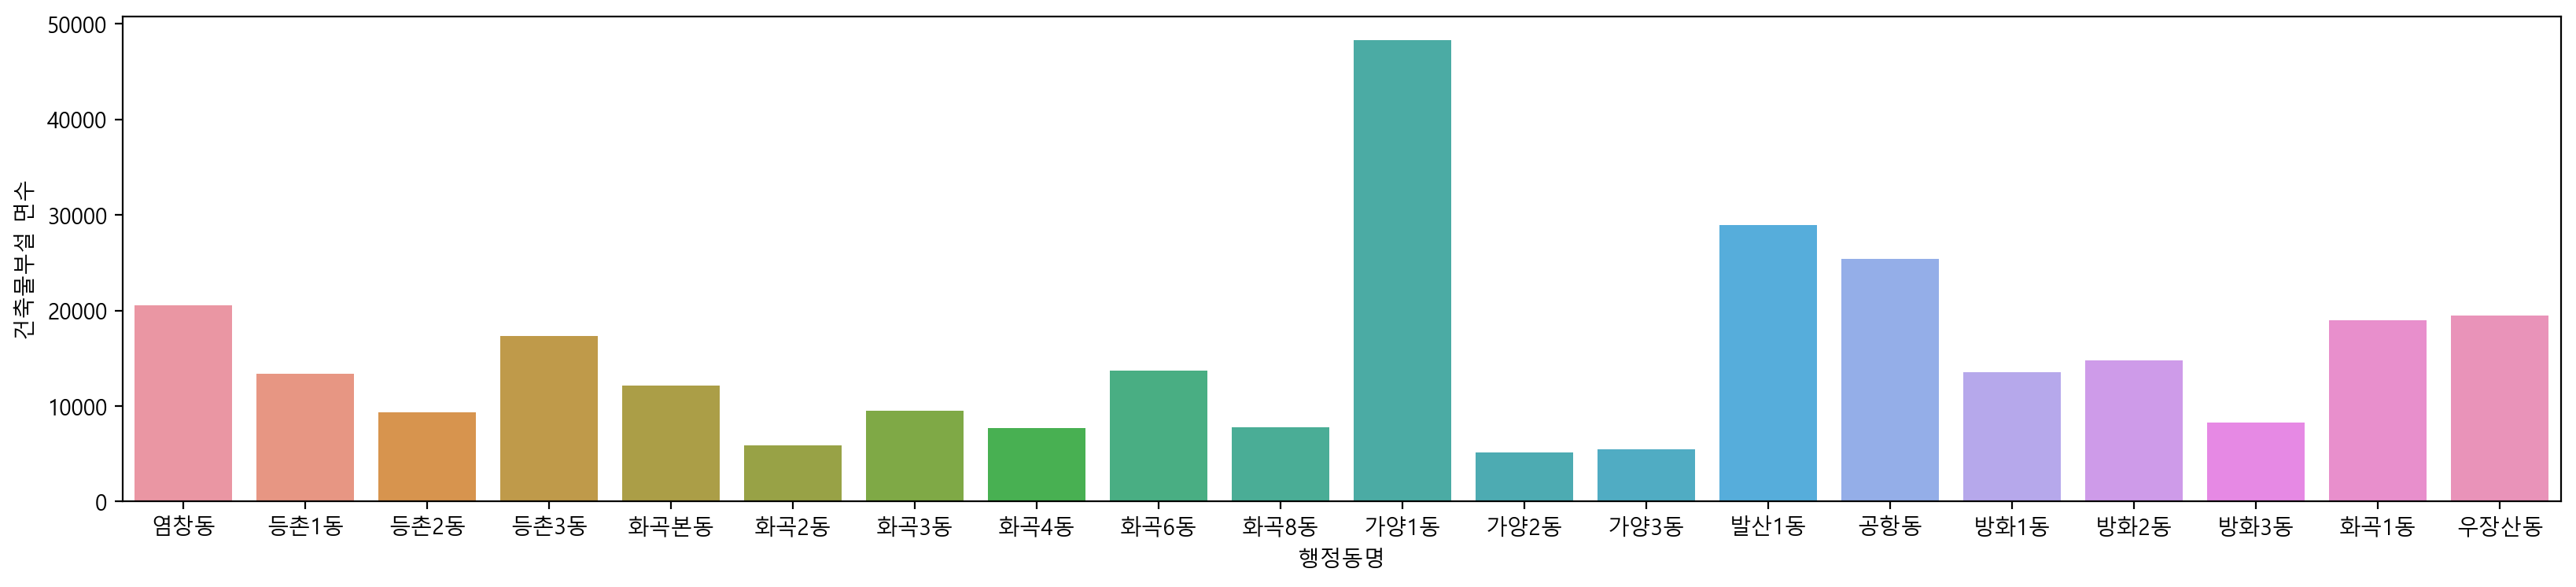

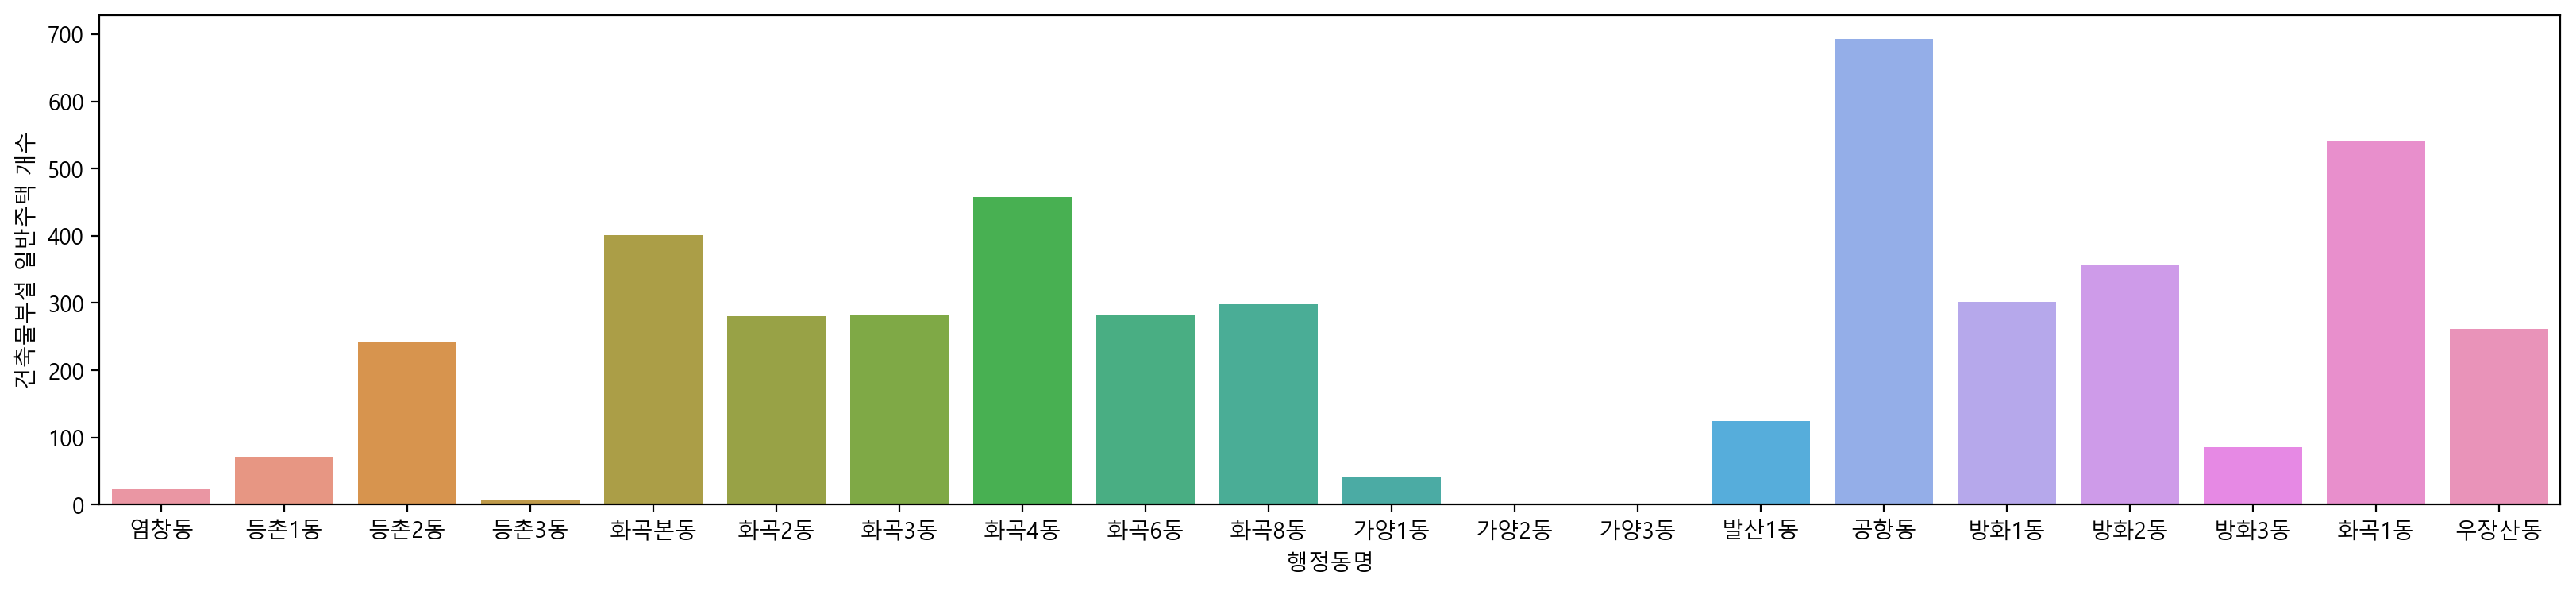

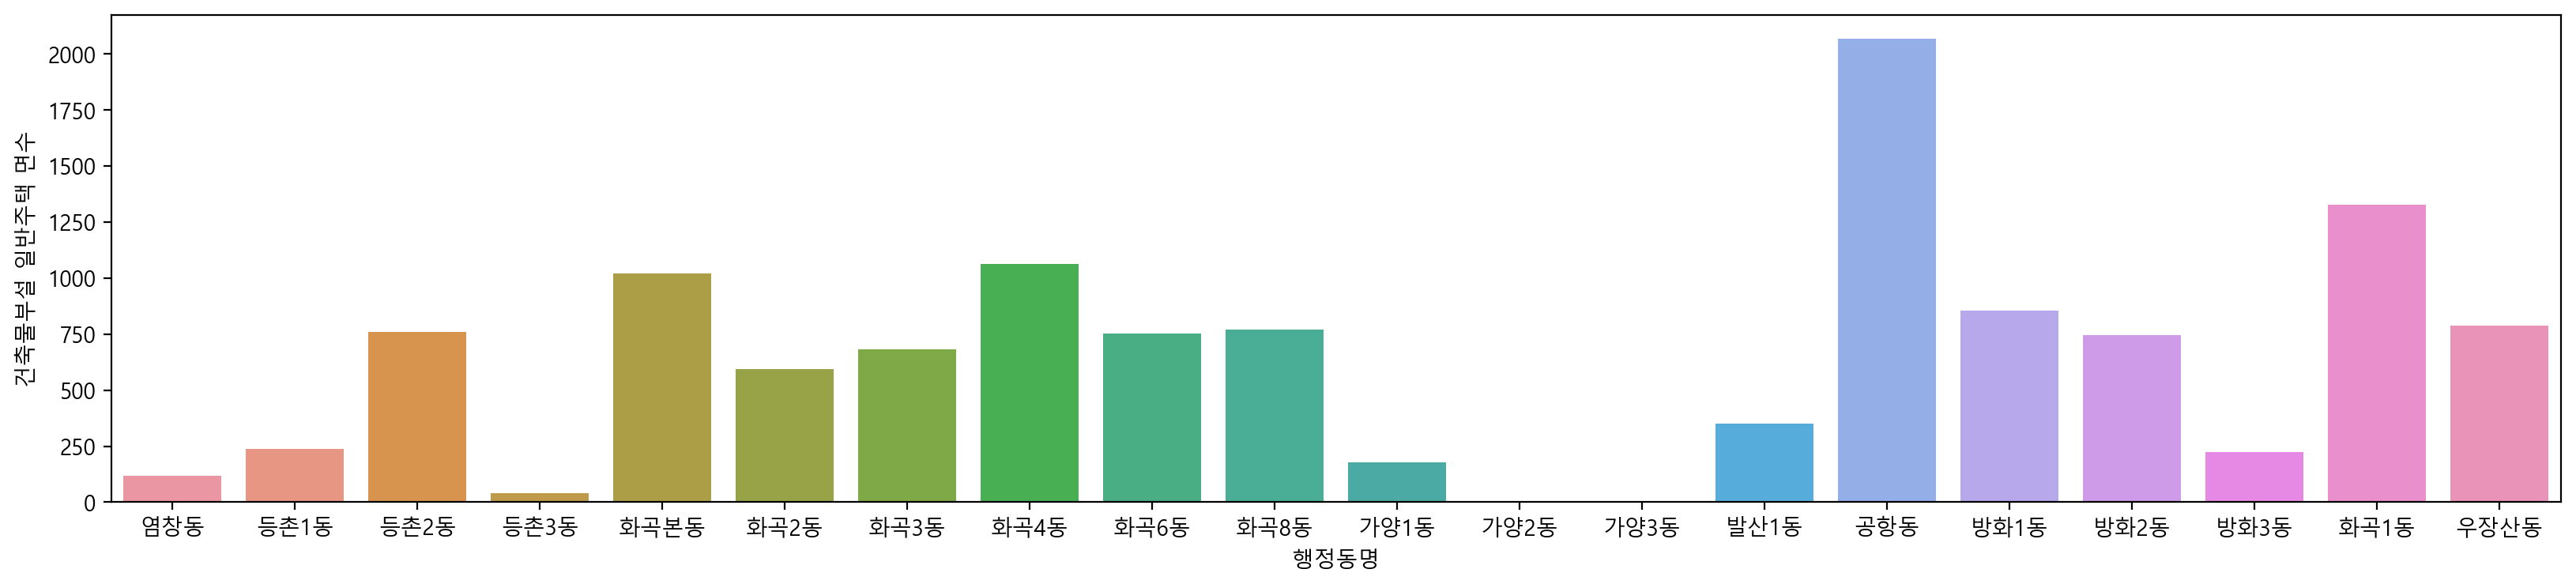

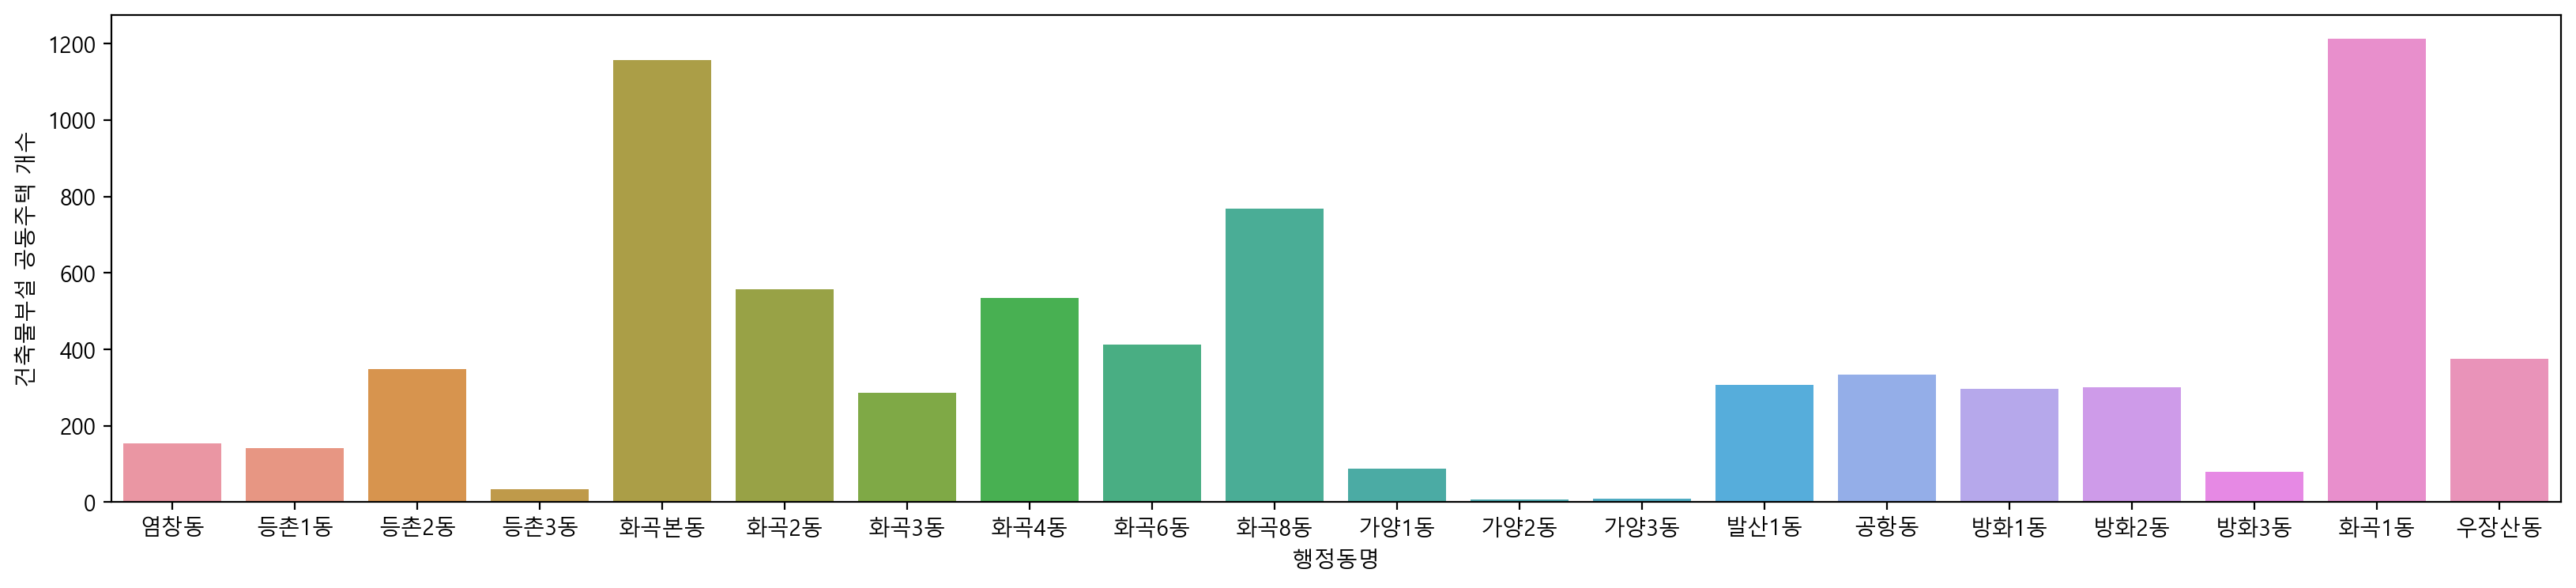

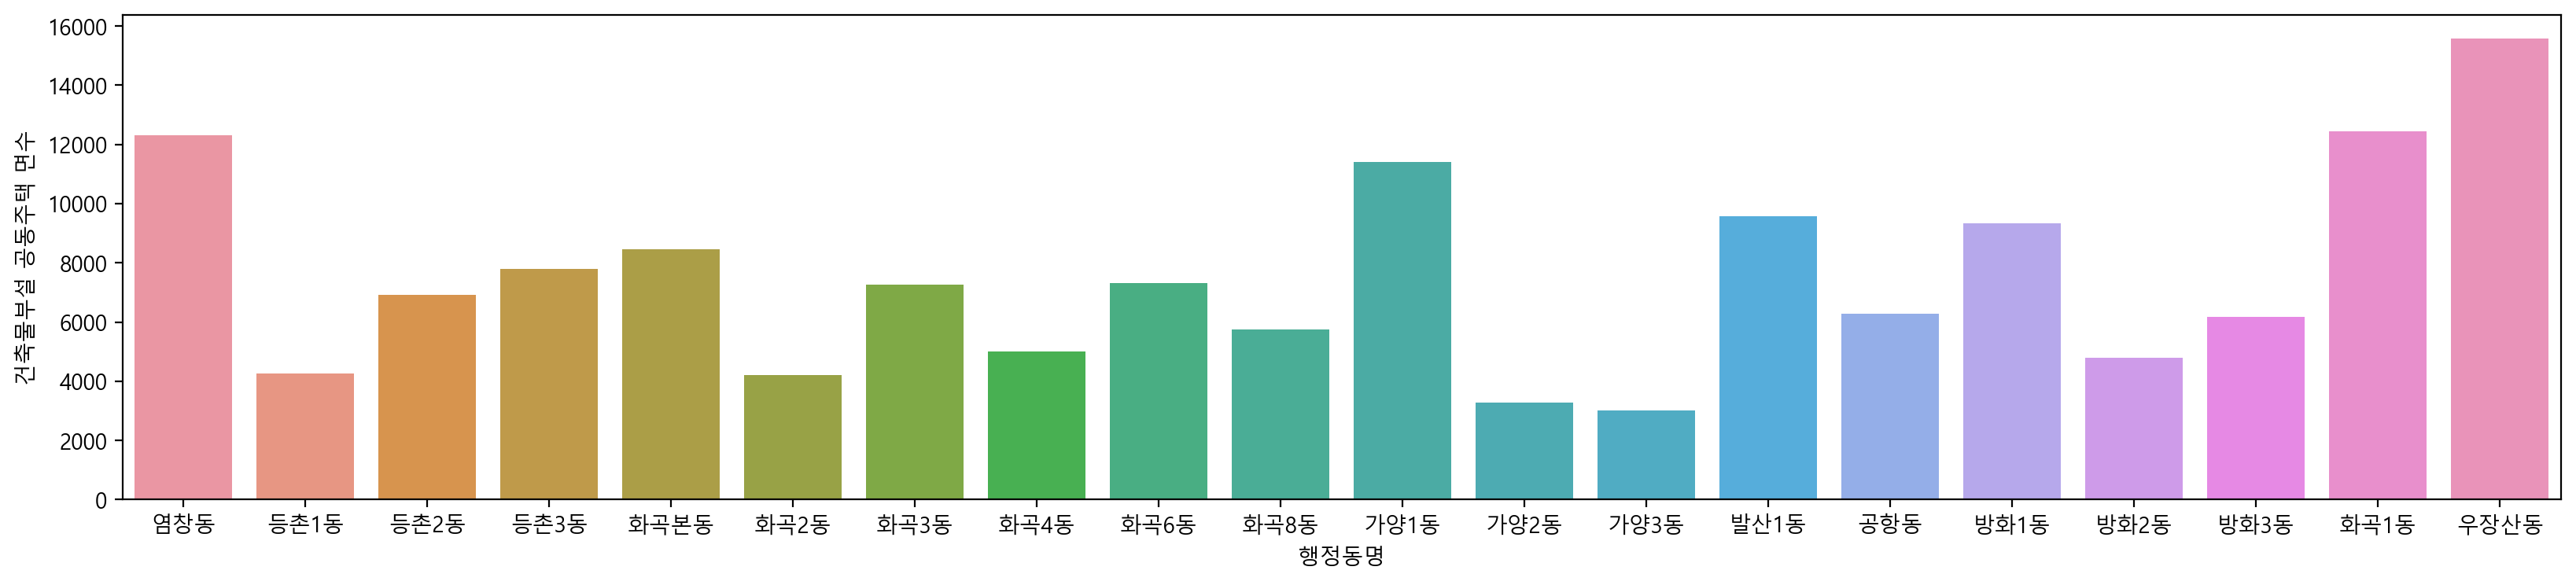

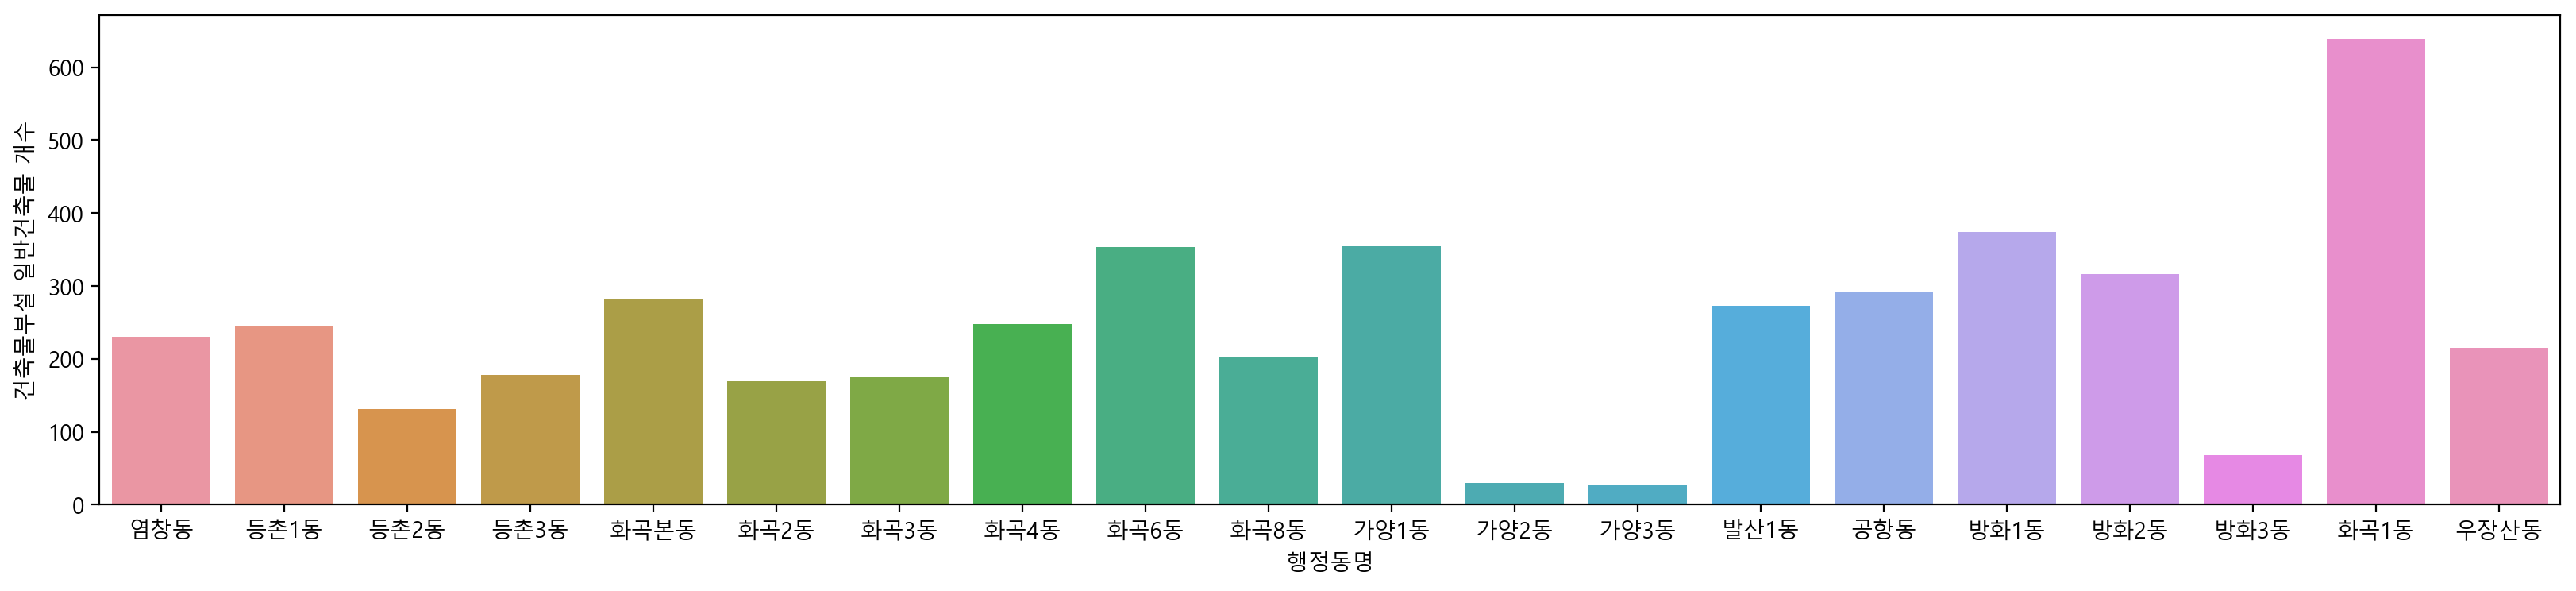

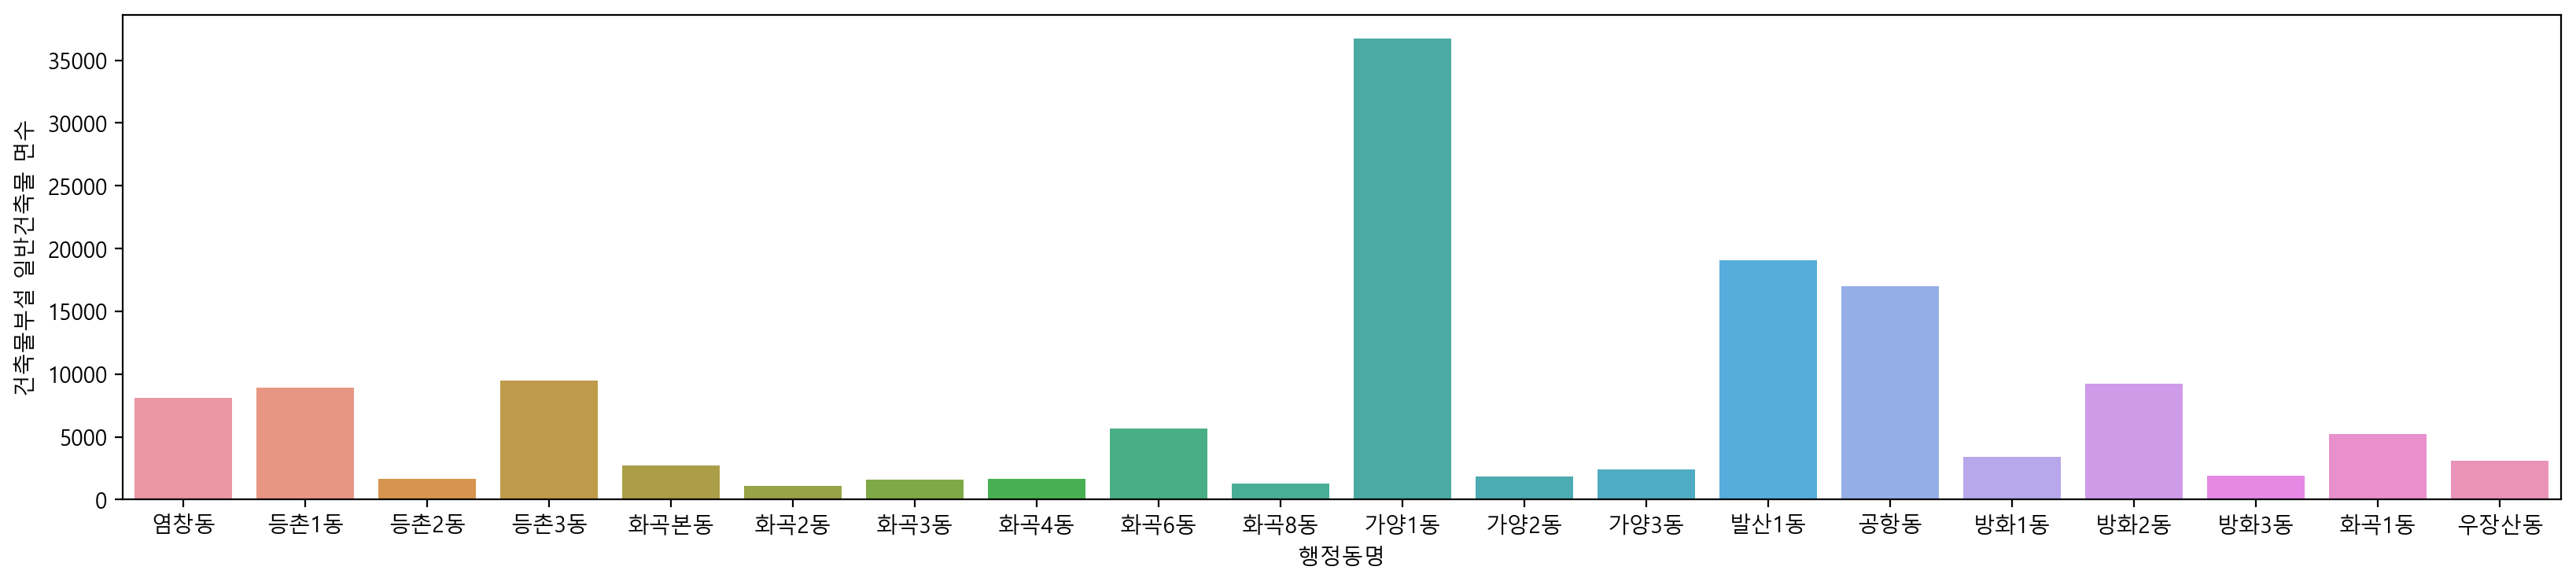

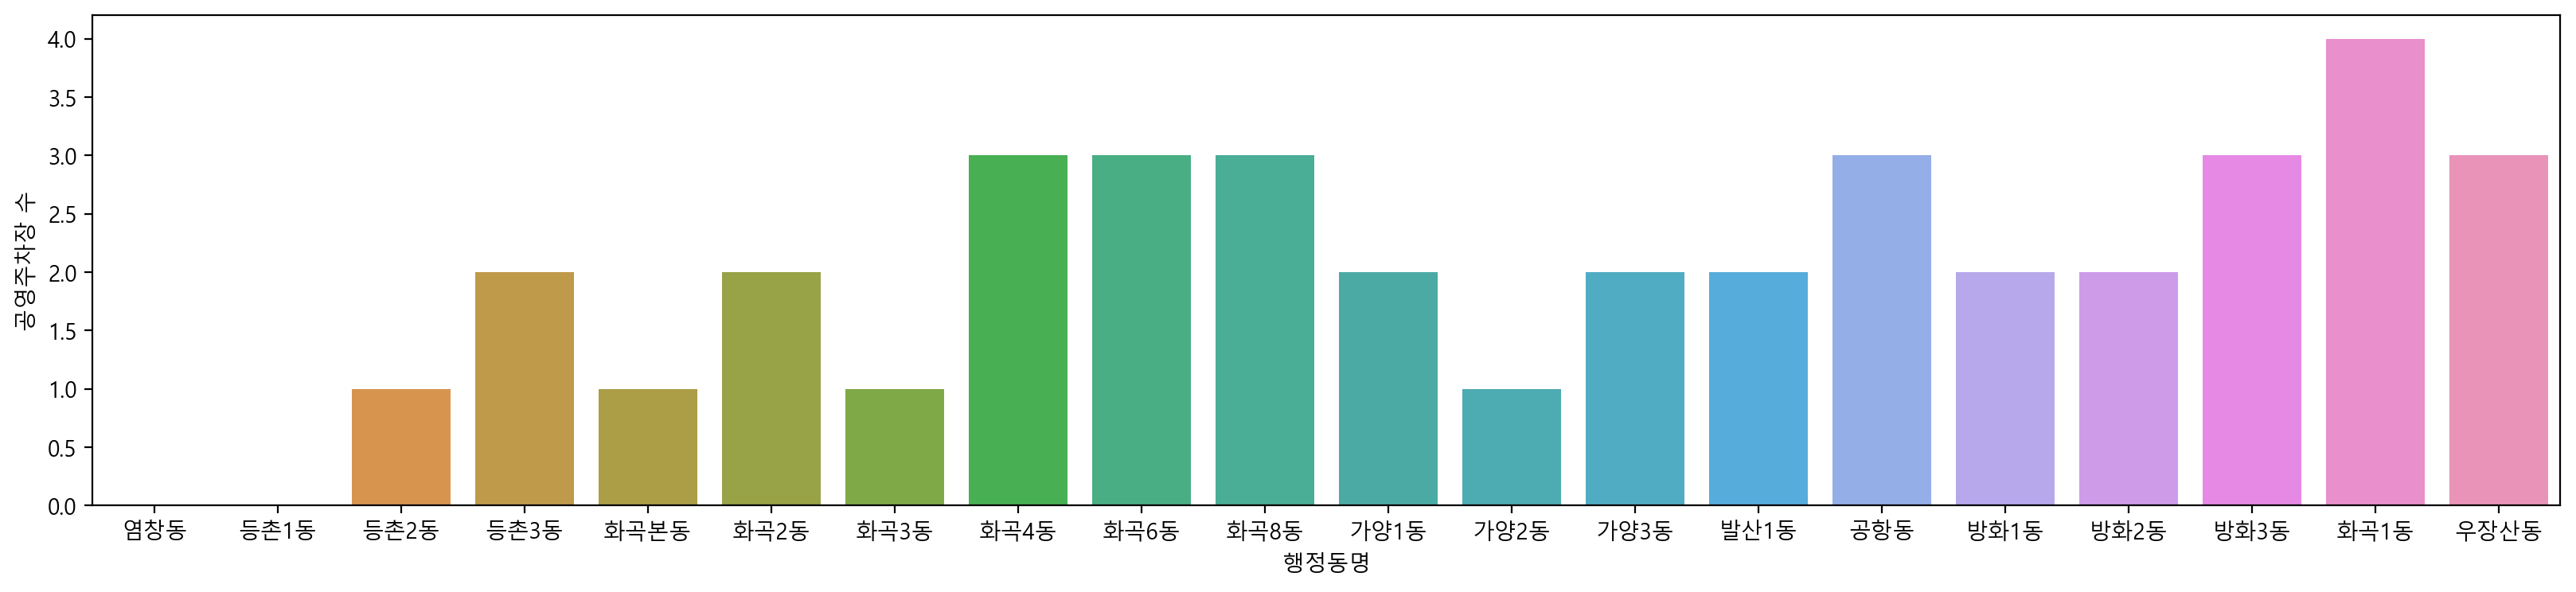

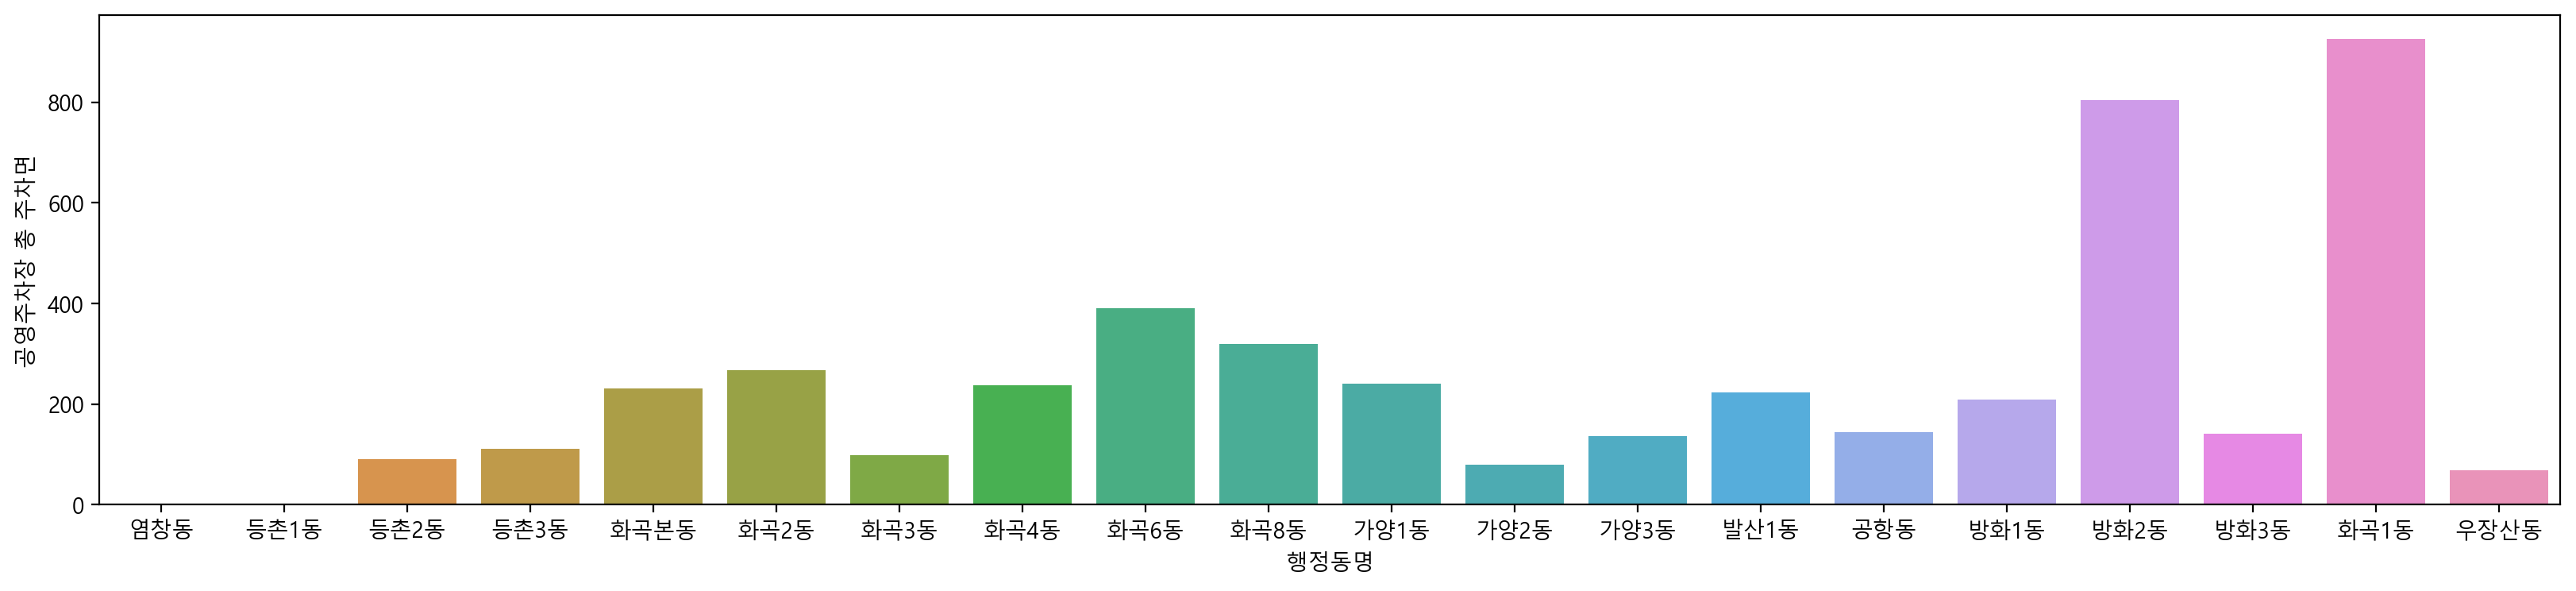

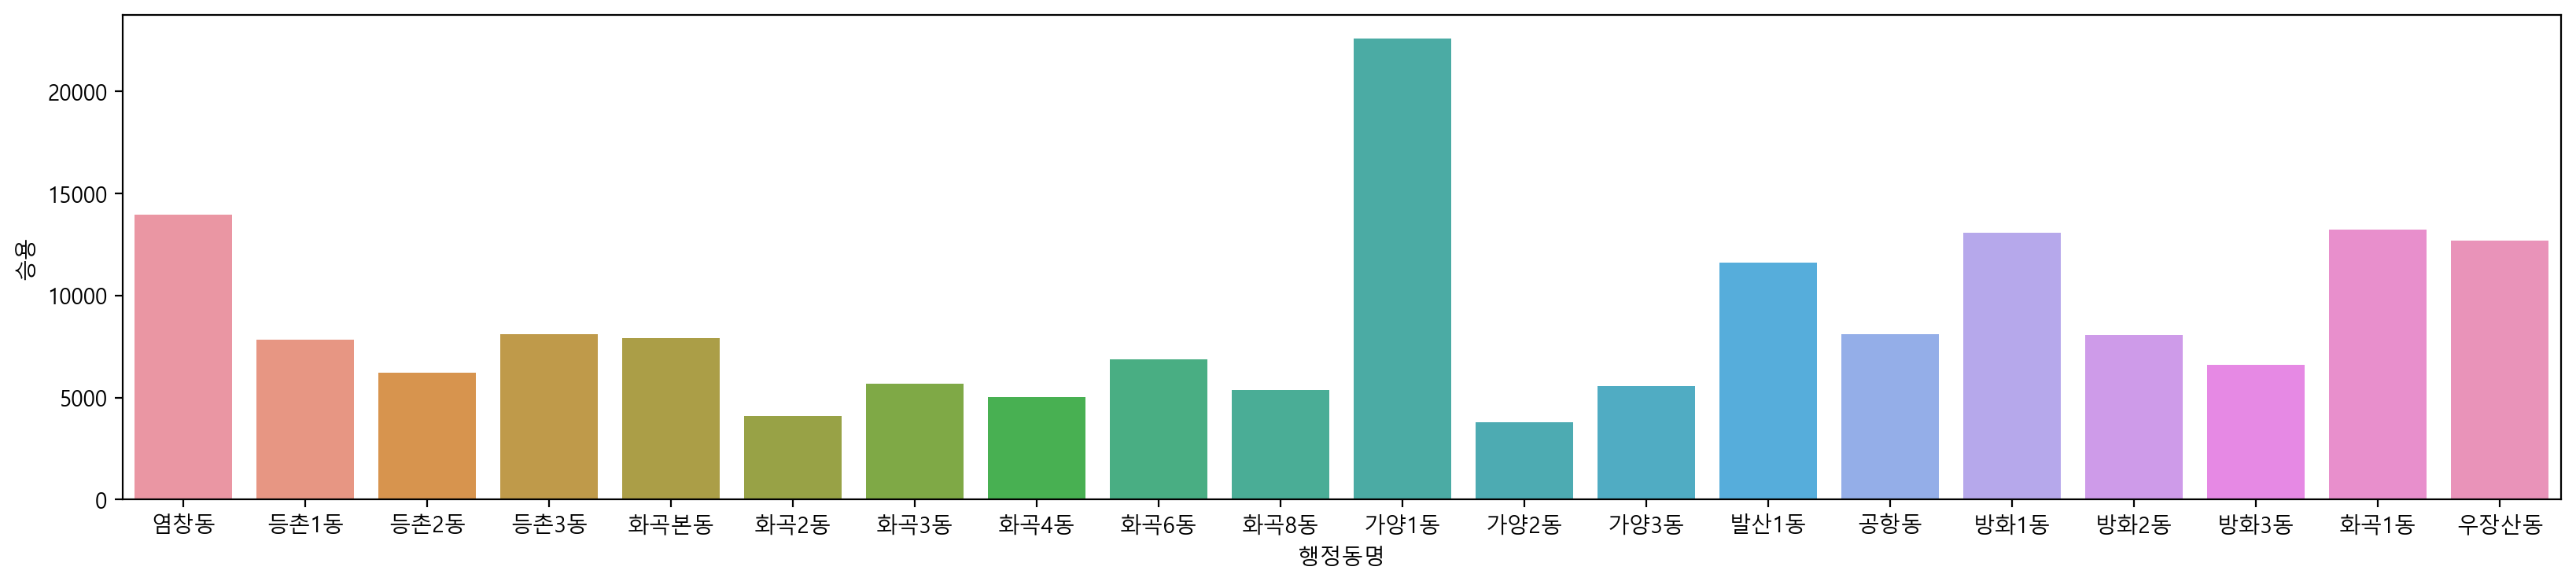

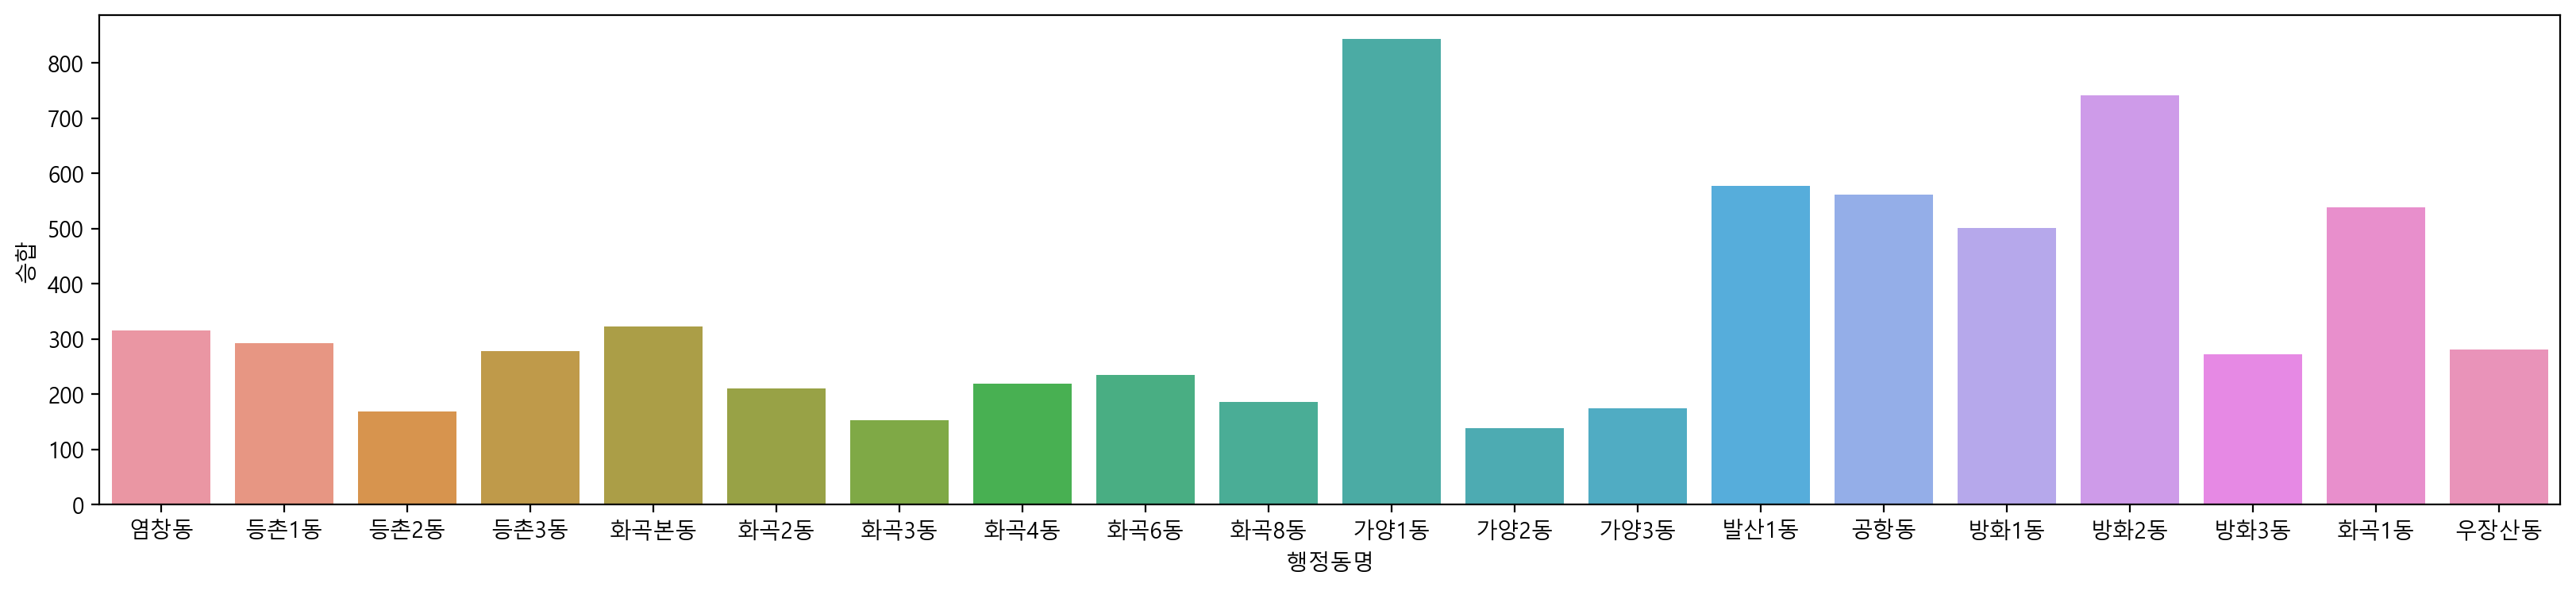

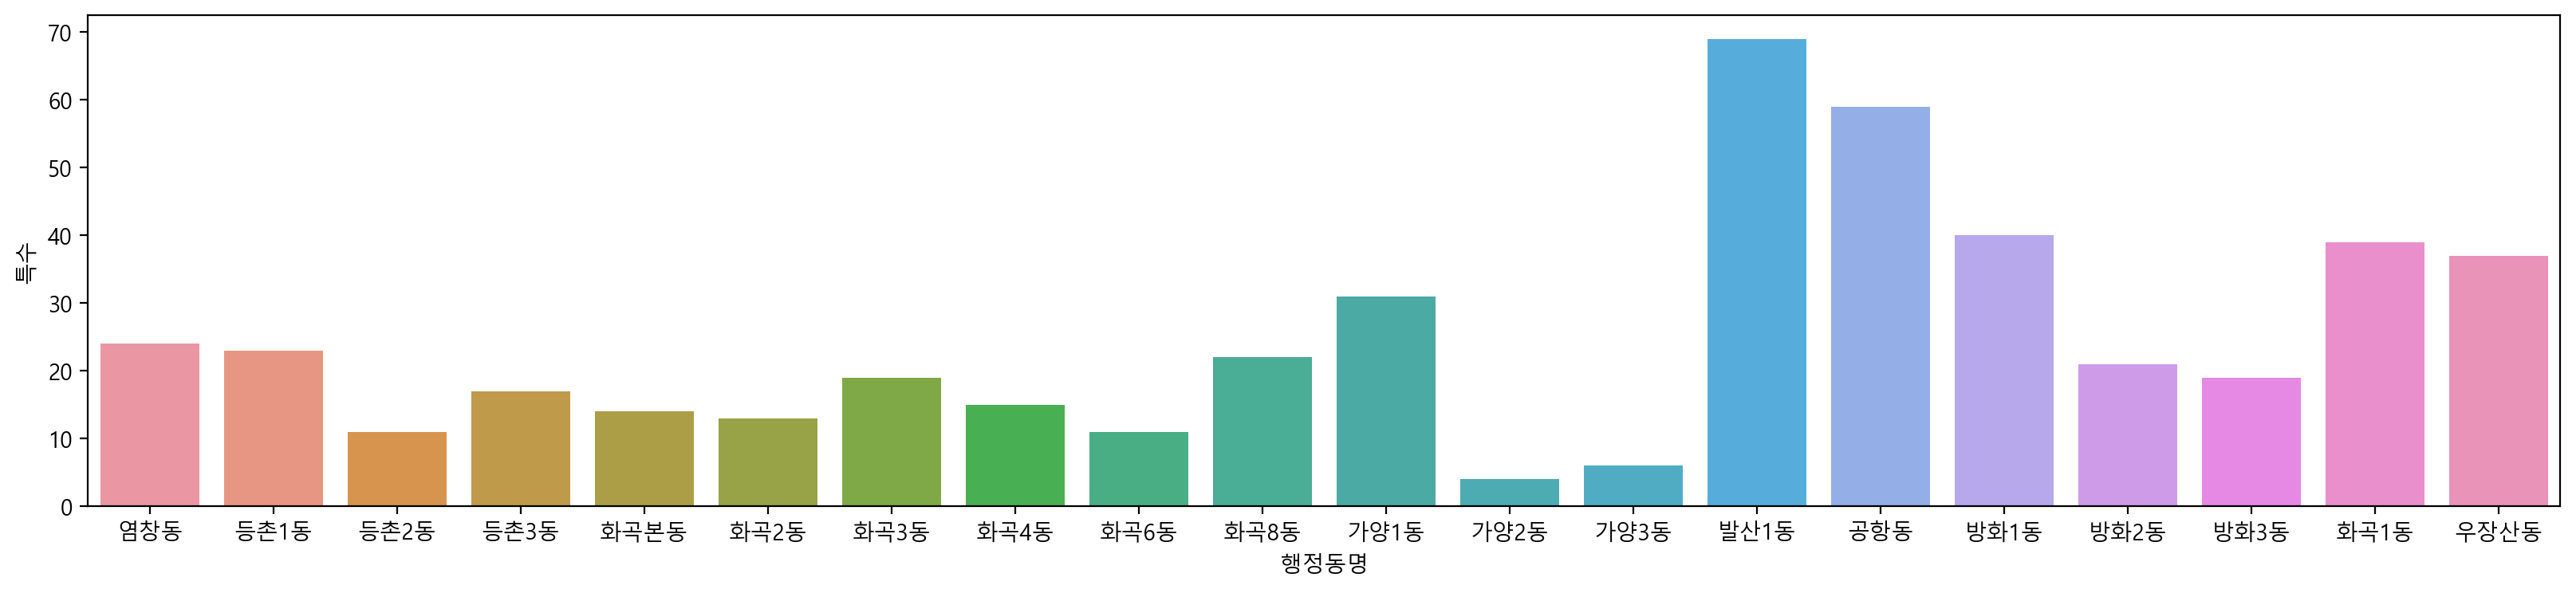

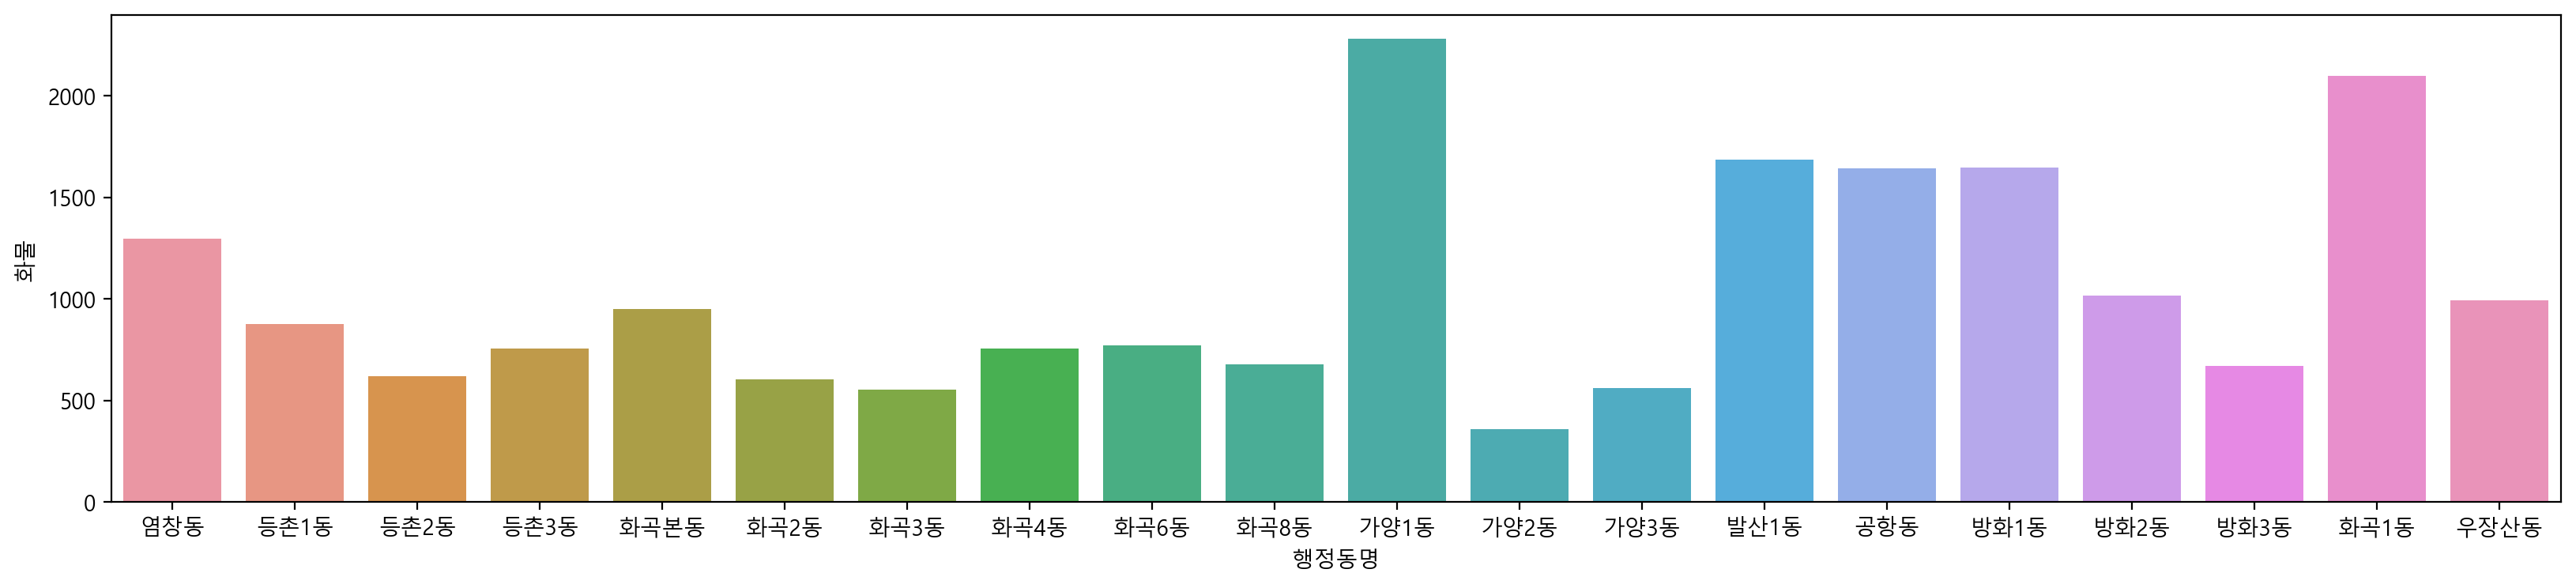

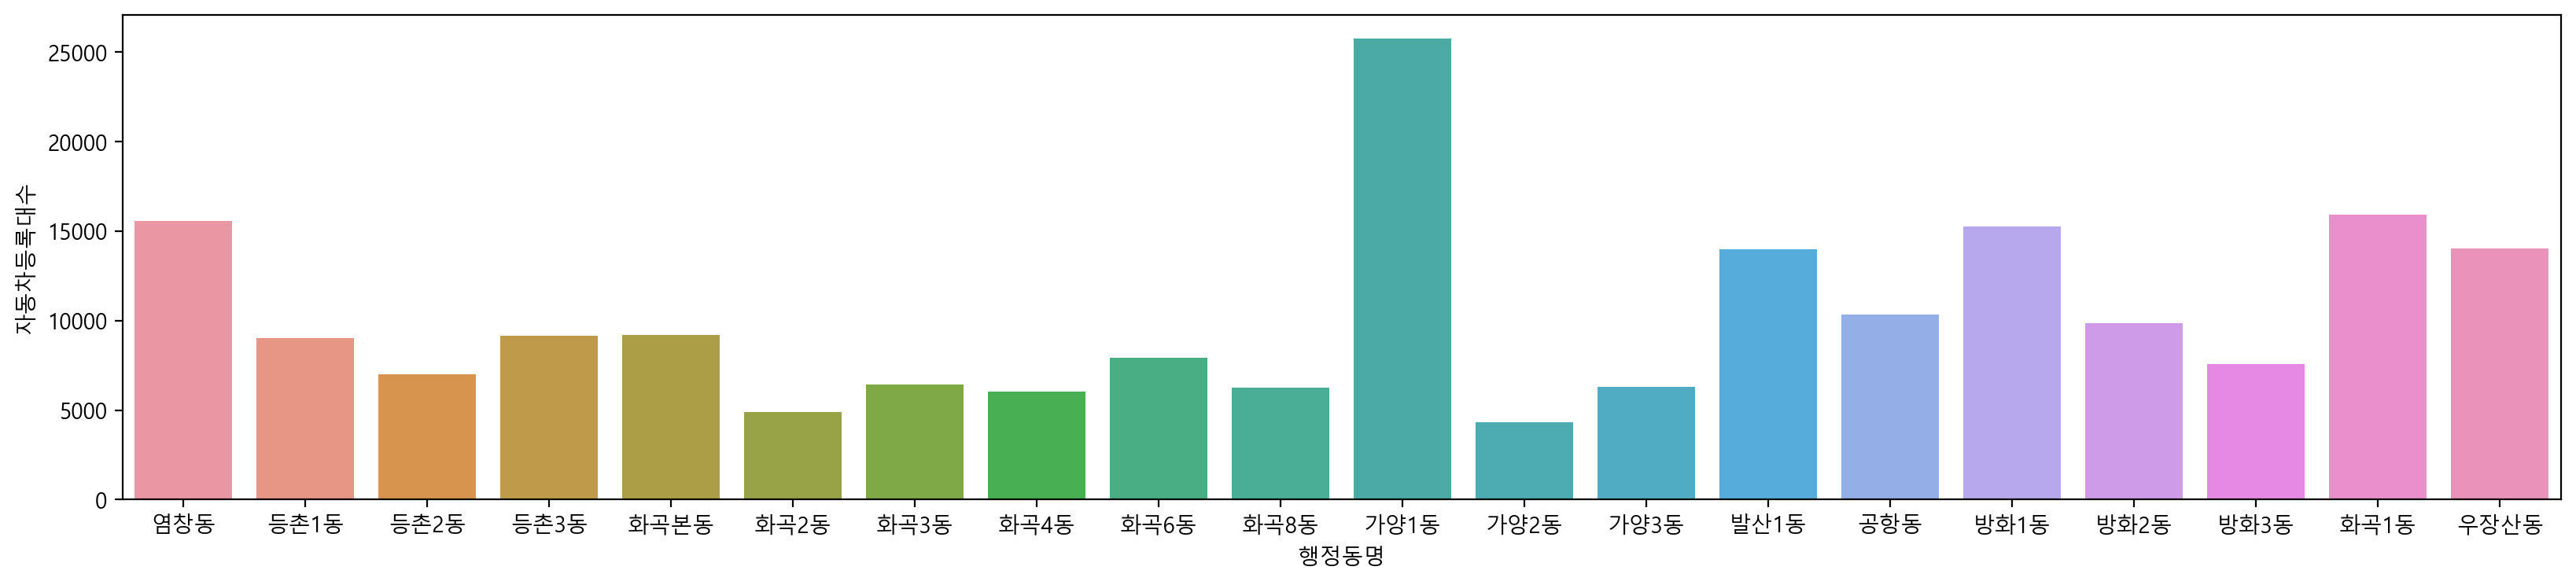

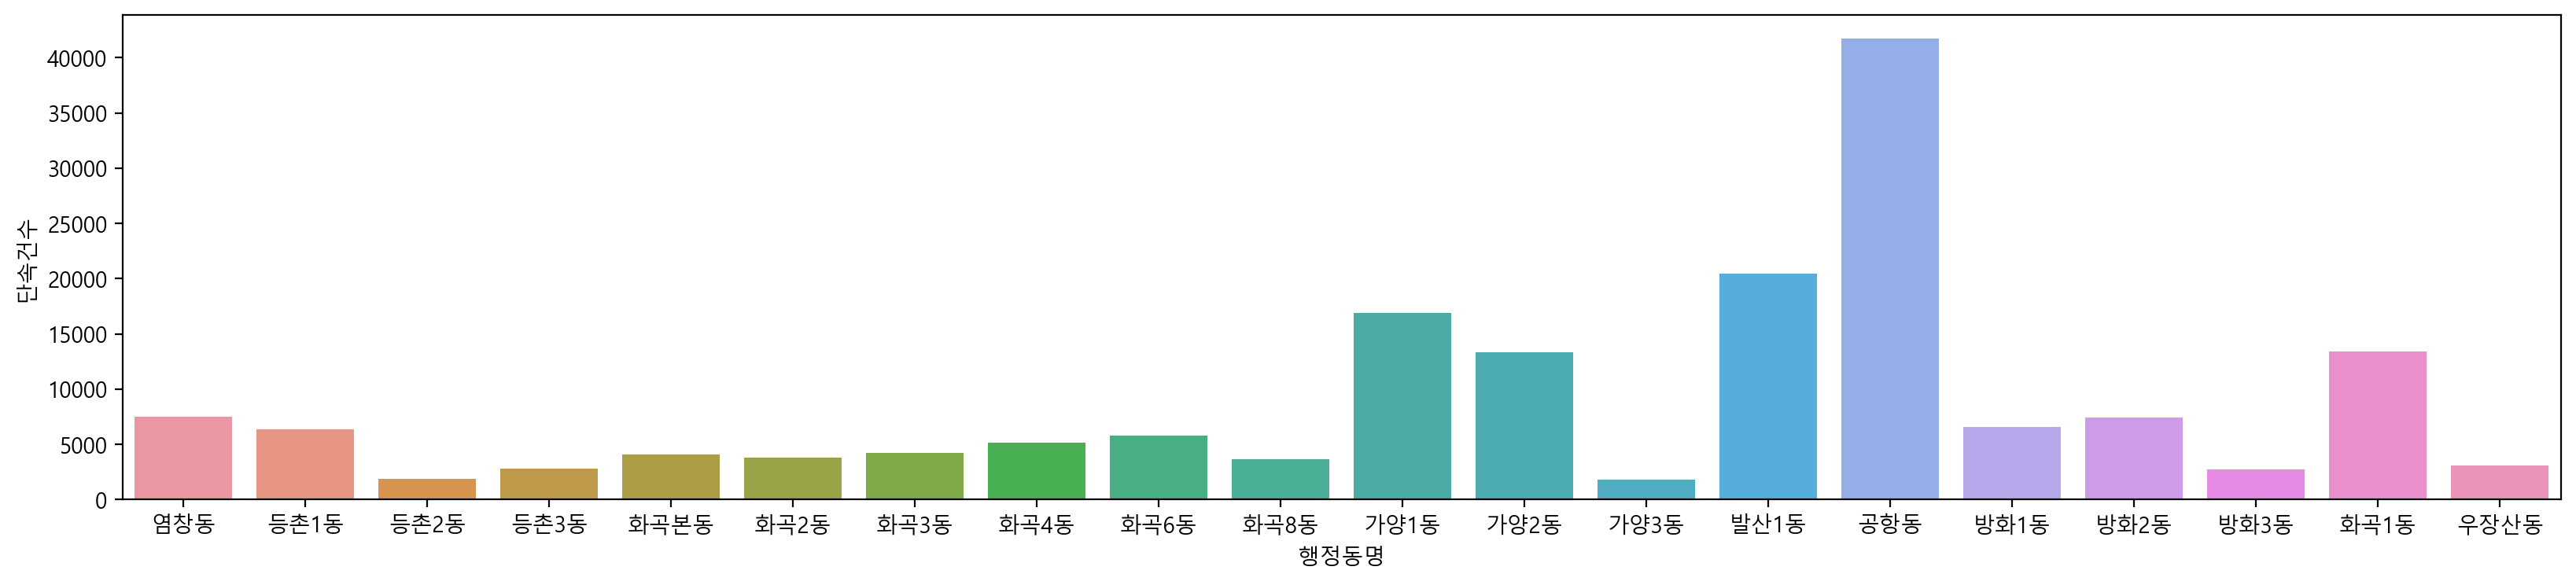

In [9]:
for i in range(1,37):
    plt.figure(figsize=(20,4))
    sns.barplot(x='행정동명', y=gangseo_car.columns[i], data=gangseo_car)
    plt.savefig(f"{'0' * int(2-len(str(i)))}{i} {gangseo_car.columns[i]}.png")
    plt.show

### 이변량분석

In [43]:
# !pip install dataframe-image

In [44]:
import scipy.stats as spst
import dataframe_image as dfi

In [11]:
# target을 단속건수로 한 이변량분석
target = '단속건수'
y = gangseo_car[target]
x = gangseo_car.drop(target, axis=1)

In [26]:
result = {'상관계수' : [], 'p-value' : []}

In [27]:
for i in range(1, len(x.columns)):
    stat = spst.pearsonr(x=x[f'{x.columns[i]}'], y=y)
    result['상관계수'].append(round(stat[0], 3))
    result['p-value'].append(round(stat[1], 3))

In [37]:
gangseo_bivariate = pd.DataFrame(result, index=x.columns[1:len(x.columns)])

In [48]:
dfi.export(gangseo_bivariate, 'C:/Users/User/Desktop/강서구 빅데이터 공모전/Merge 데이터/구별 이변량.png', max_rows=-1, max_cols=-1, table_conversion='matplotlib')

### 행정동별 자동차별 그래프

In [49]:
gangseo_car.columns

Index(['행정동명', '주차장 개수', '주차장 면수', '공영 개수', '공영 면수', '민영 개수', '민영 면수', '노상 개수',
       '노상 면수', '노상 시영 개수', '노상 시영 면수', '노상 구영 개수', '노상 구영 면수', '노외 개수',
       '노외 면수', '노외 시영 개수', '노외 시영 면수', '노외 구영 개수', '노외 구영 면수', '노외 민영 개수',
       '노외 민영 면수', '건축물부설 개수', '건축물부설 면수', '건축물부설 일반주택 개수', '건축물부설 일반주택 면수',
       '건축물부설 공동주택 개수', '건축물부설 공동주택 면수', '건축물부설 일반건축물 개수', '건축물부설 일반건축물 면수',
       '공영주차장 수', '공영주차장 총 주차면', '승용', '승합', '특수', '화물', '자동차등록대수', '단속건수'],
      dtype='object')

In [189]:
car = gangseo_car[['승용', '승합', '특수', '화물']]
car.index = gangseo_car['행정동명']
car = car.sort_values(by='승용')

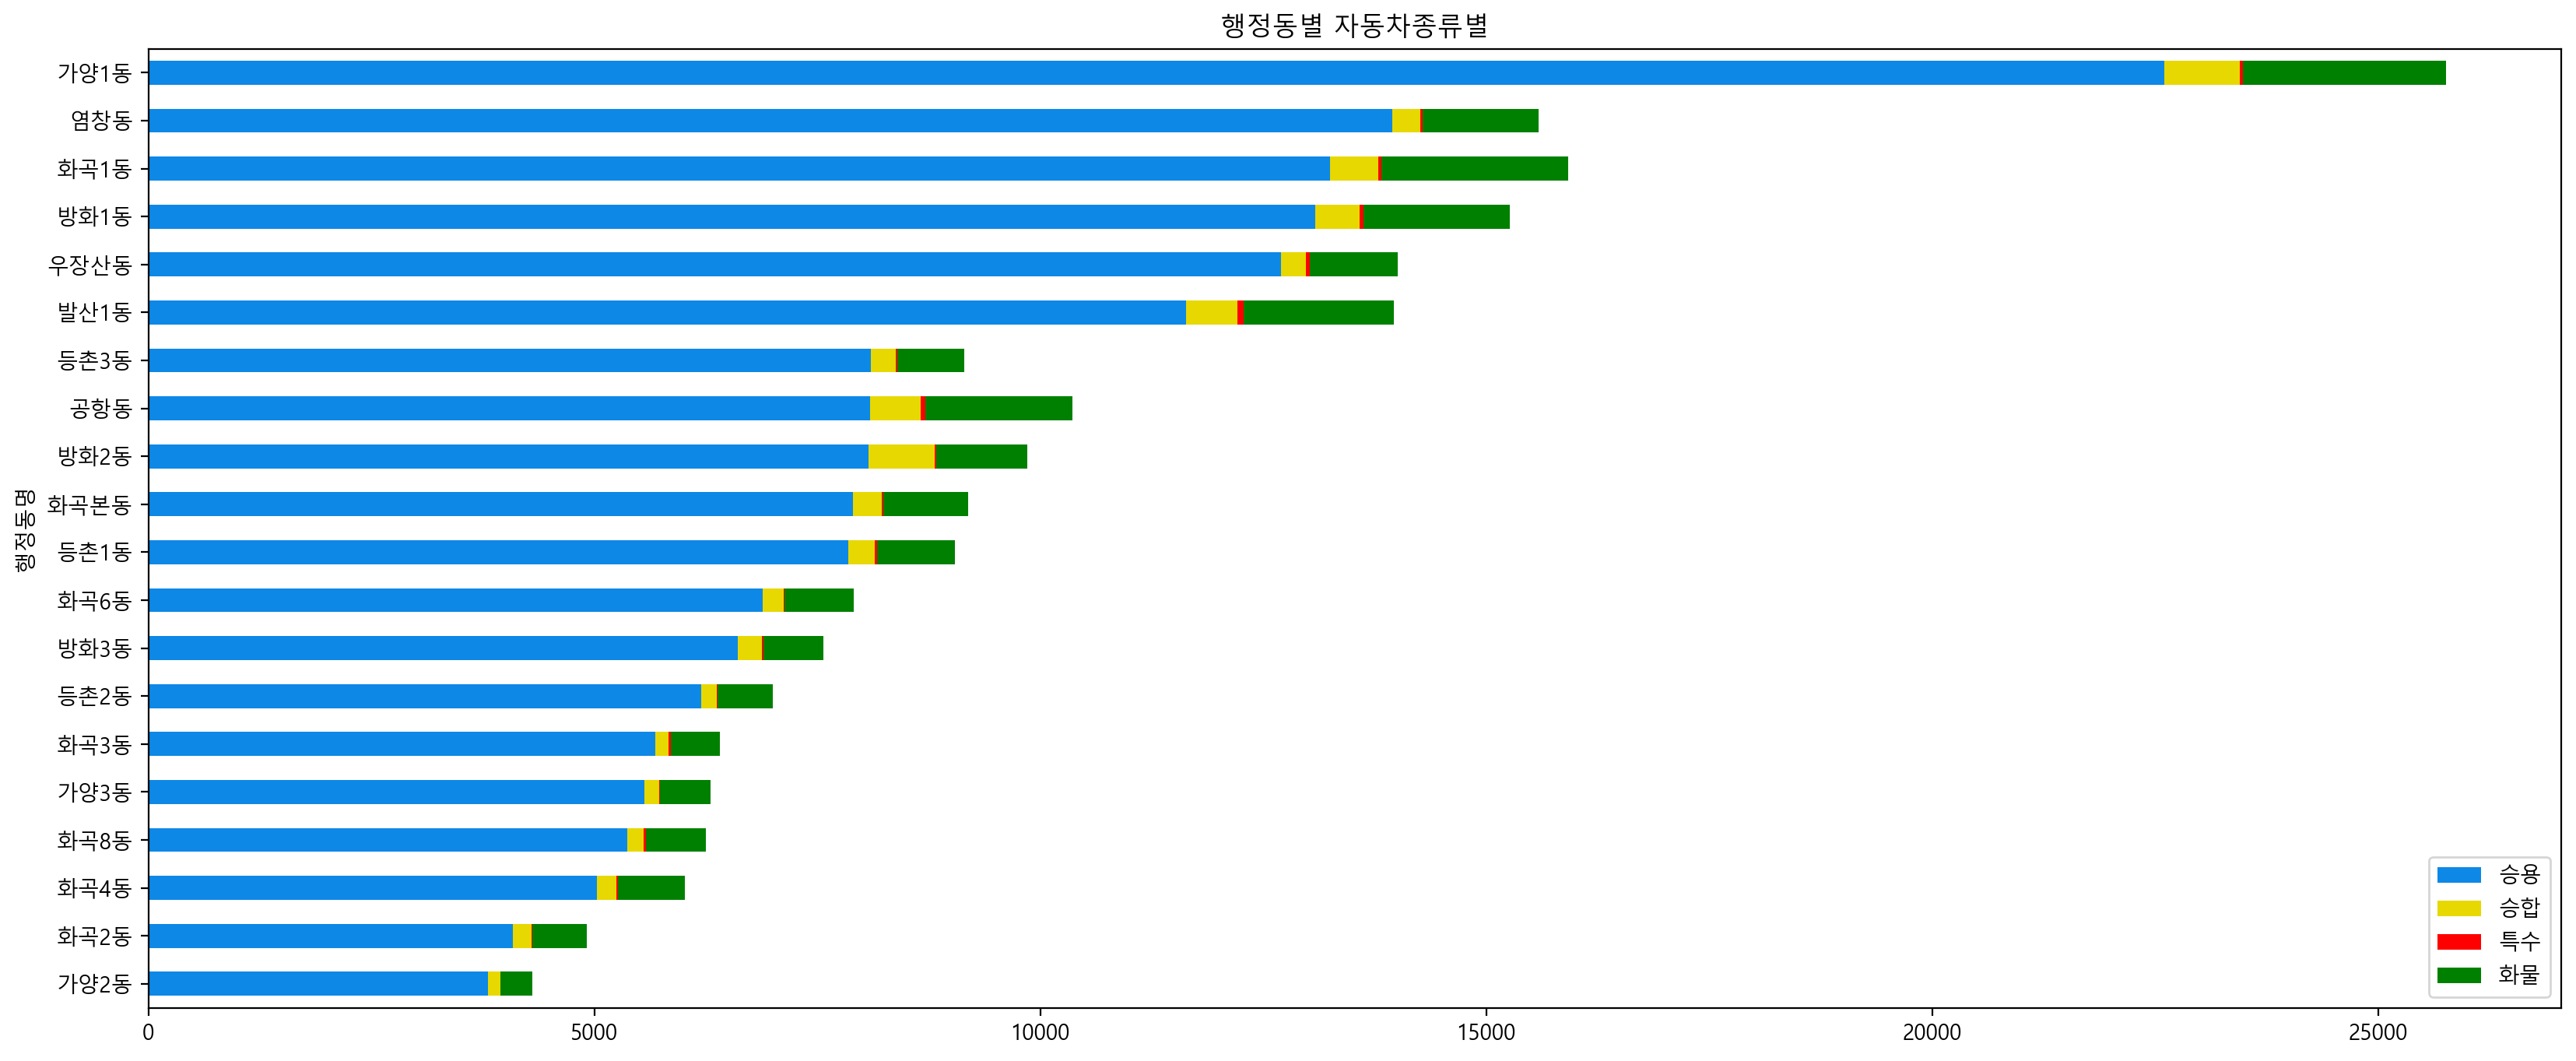

In [190]:
car.plot(kind='barh', stacked=True, figsize=(20,8), color=["#0d88e6", "#e6d800", "red", "green"], title='행정동별 자동차종류별')
#plt.savefig('행정동별 자동차종류별.png')

### 공영 면수, 민영 면수

In [187]:
parkinglot = gangseo_car[['공영 면수', '민영 면수']]
parkinglot.index = gangseo_car['행정동명']
parkinglot = parkinglot.sort_values(by='민영 면수')

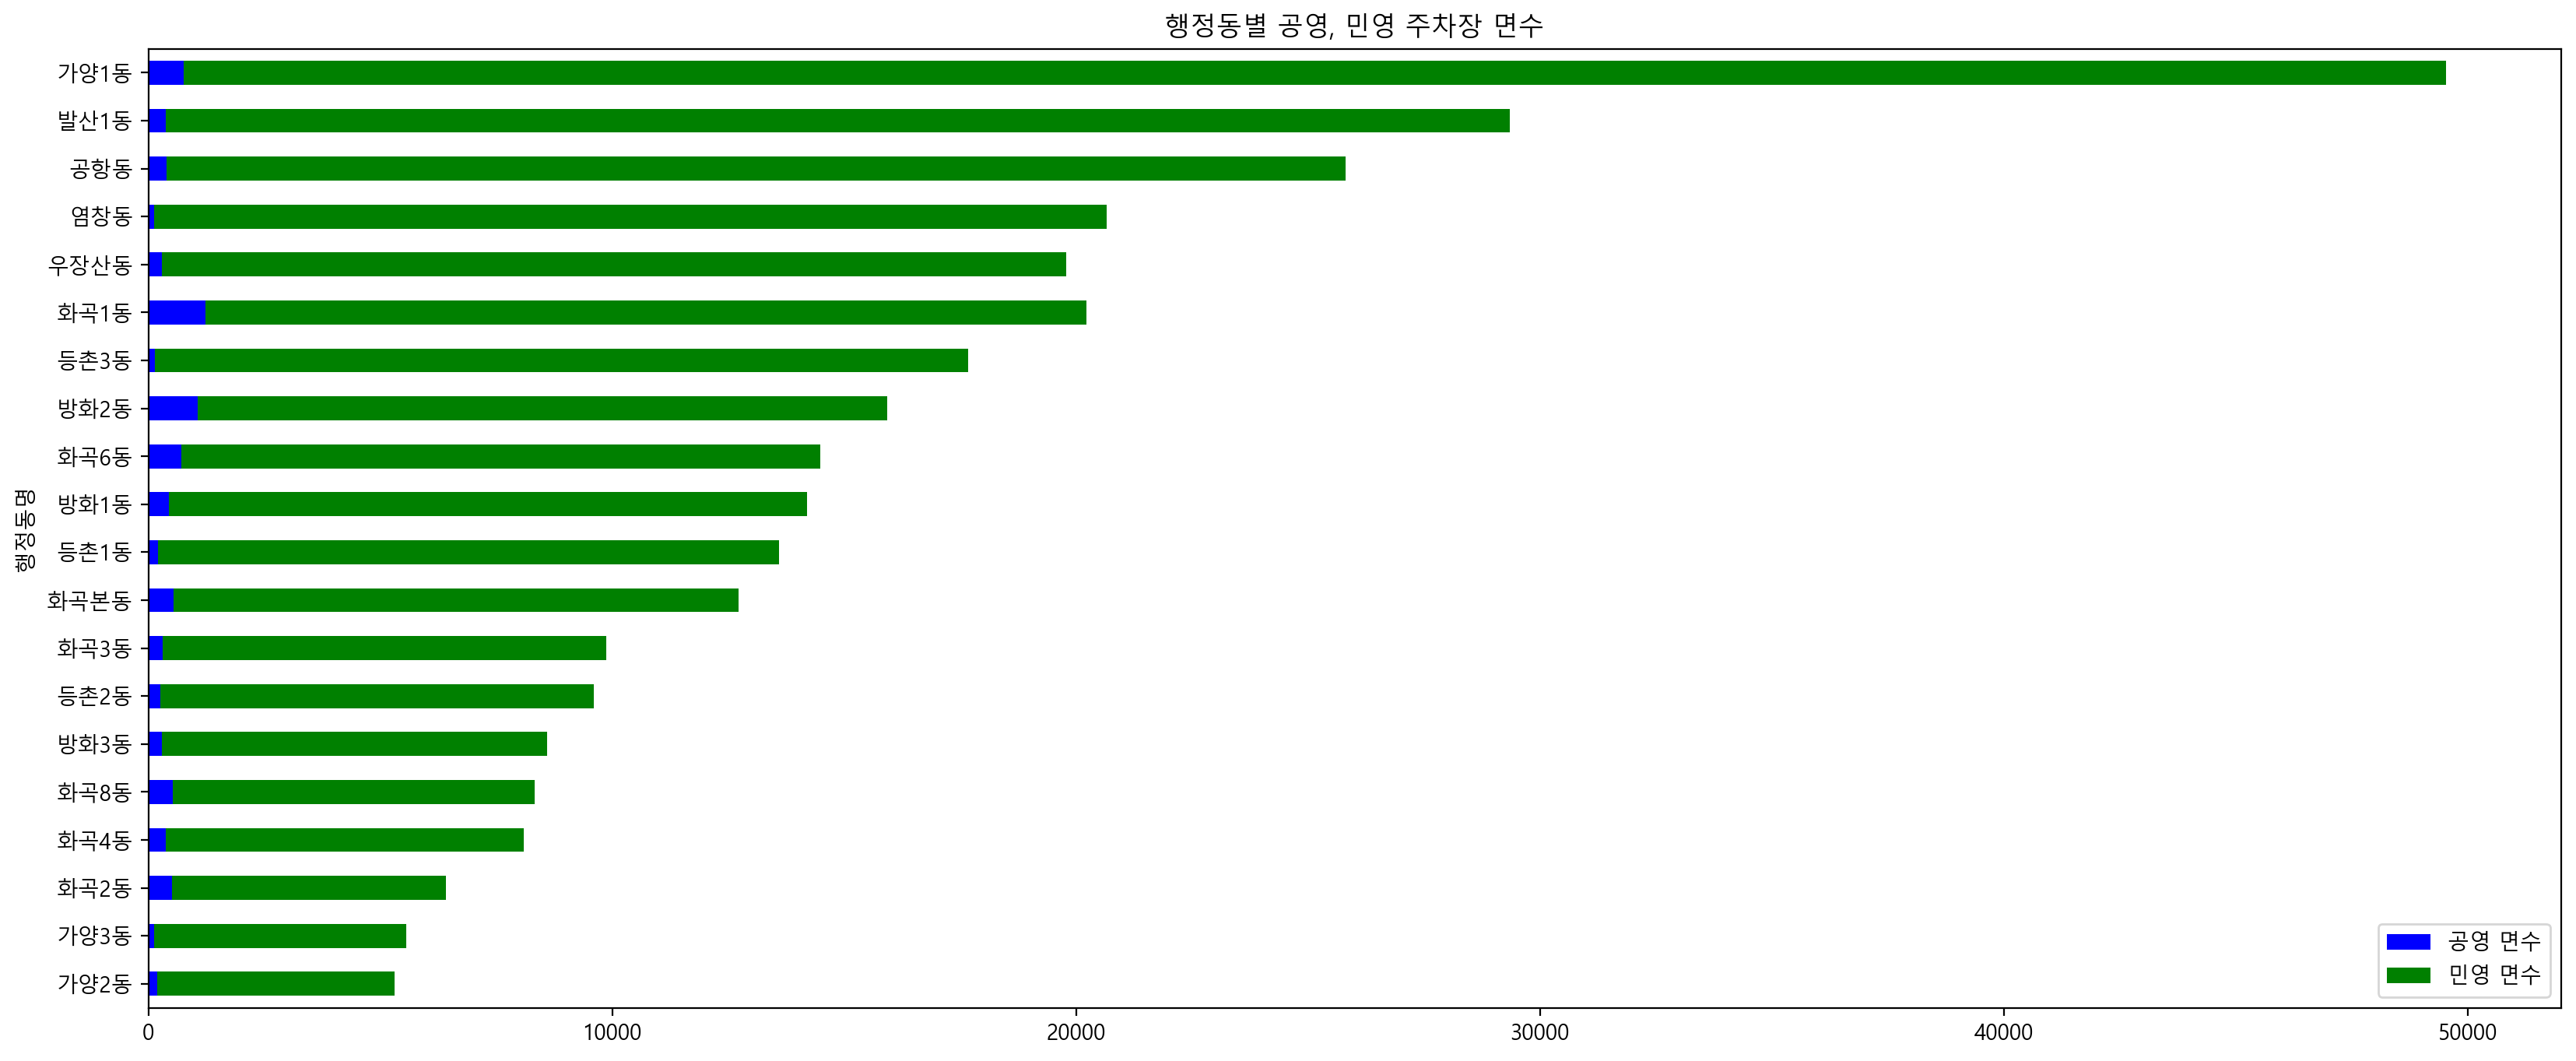

In [188]:
parkinglot.plot(kind='barh', stacked=True, figsize=(20,8), color=['blue', 'green'], title='행정동별 공영, 민영 주차장 면수')
#plt.savefig('행정동별 공영,민영 주차장 면수.png')

### 행정동별 민영주차장 면수

In [155]:
gangseo_car.columns

Index(['행정동명', '주차장 개수', '주차장 면수', '공영 개수', '공영 면수', '민영 개수', '민영 면수', '노상 개수',
       '노상 면수', '노상 시영 개수', '노상 시영 면수', '노상 구영 개수', '노상 구영 면수', '노외 개수',
       '노외 면수', '노외 시영 개수', '노외 시영 면수', '노외 구영 개수', '노외 구영 면수', '노외 민영 개수',
       '노외 민영 면수', '건축물부설 개수', '건축물부설 면수', '건축물부설 일반주택 개수', '건축물부설 일반주택 면수',
       '건축물부설 공동주택 개수', '건축물부설 공동주택 면수', '건축물부설 일반건축물 개수', '건축물부설 일반건축물 면수',
       '공영주차장 수', '공영주차장 총 주차면', '승용', '승합', '특수', '화물', '자동차등록대수', '단속건수'],
      dtype='object')

In [183]:
private1 = gangseo_car[['노외 민영 면수', '건축물부설 면수']]
private1.index = gangseo_car['행정동명']
private1 = private1.sort_values(by='건축물부설 면수')

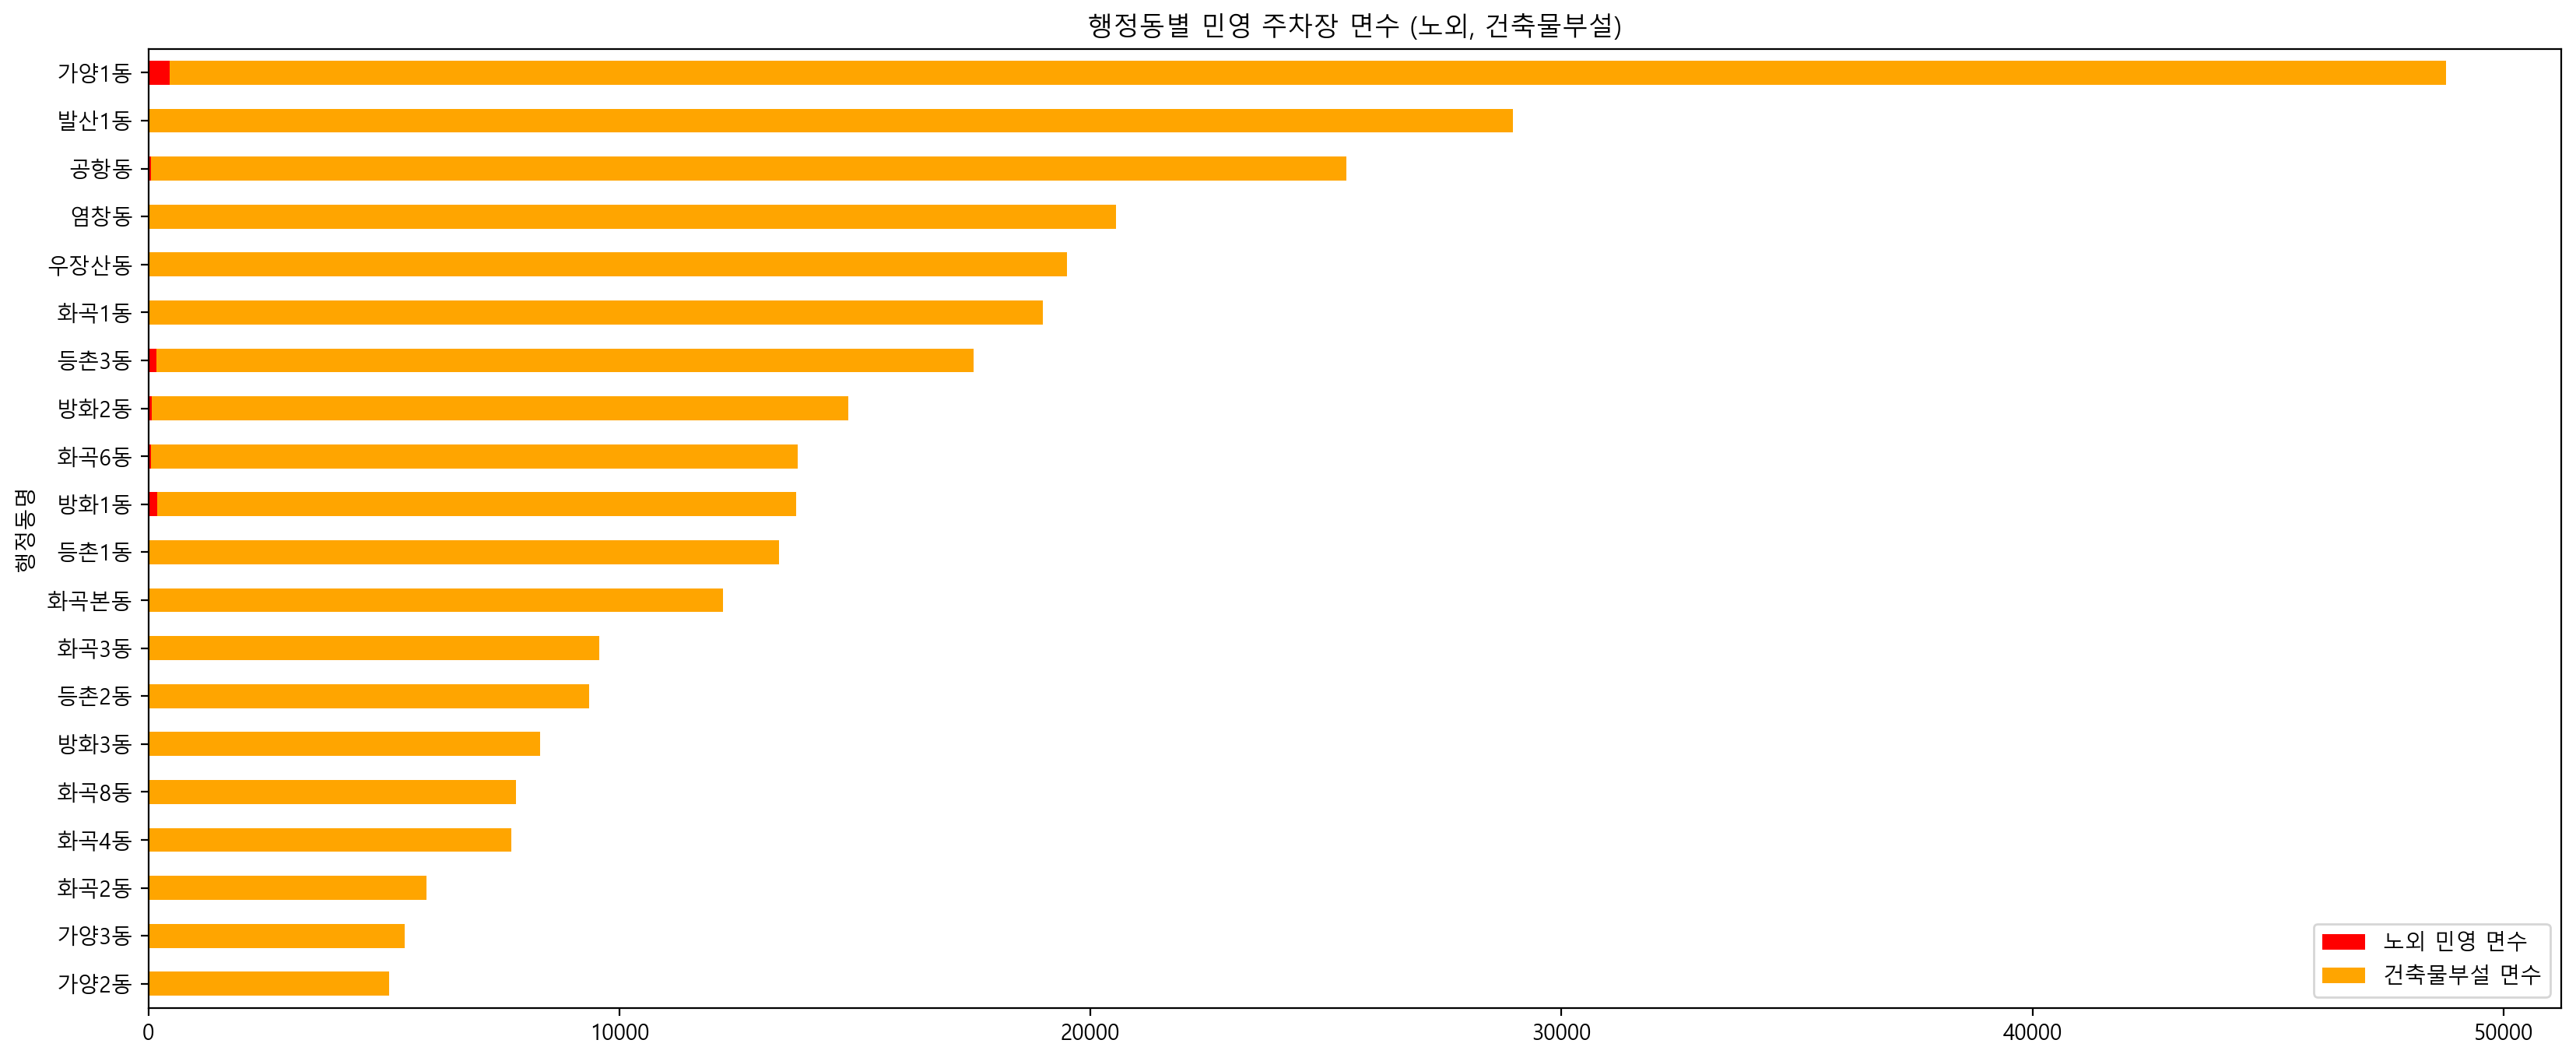

In [191]:
private1.plot(kind='barh', stacked=True, figsize=(20,8), color=['red', 'orange'], title='행정동별 민영 주차장 면수 (노외, 건축물부설)')
#plt.savefig('행정동별 민영주차장 면수(노외, 건축물부설).png')

In [192]:
gangseo_car.columns

Index(['행정동명', '주차장 개수', '주차장 면수', '공영 개수', '공영 면수', '민영 개수', '민영 면수', '노상 개수',
       '노상 면수', '노상 시영 개수', '노상 시영 면수', '노상 구영 개수', '노상 구영 면수', '노외 개수',
       '노외 면수', '노외 시영 개수', '노외 시영 면수', '노외 구영 개수', '노외 구영 면수', '노외 민영 개수',
       '노외 민영 면수', '건축물부설 개수', '건축물부설 면수', '건축물부설 일반주택 개수', '건축물부설 일반주택 면수',
       '건축물부설 공동주택 개수', '건축물부설 공동주택 면수', '건축물부설 일반건축물 개수', '건축물부설 일반건축물 면수',
       '공영주차장 수', '공영주차장 총 주차면', '승용', '승합', '특수', '화물', '자동차등록대수', '단속건수'],
      dtype='object')

In [201]:
private2 = gangseo_car[['건축물부설 일반주택 면수', '건축물부설 공동주택 면수', '건축물부설 일반건축물 면수']]
private2.index = gangseo_car['행정동명']
private2 = private2.sort_values(by='건축물부설 일반건축물 면수')

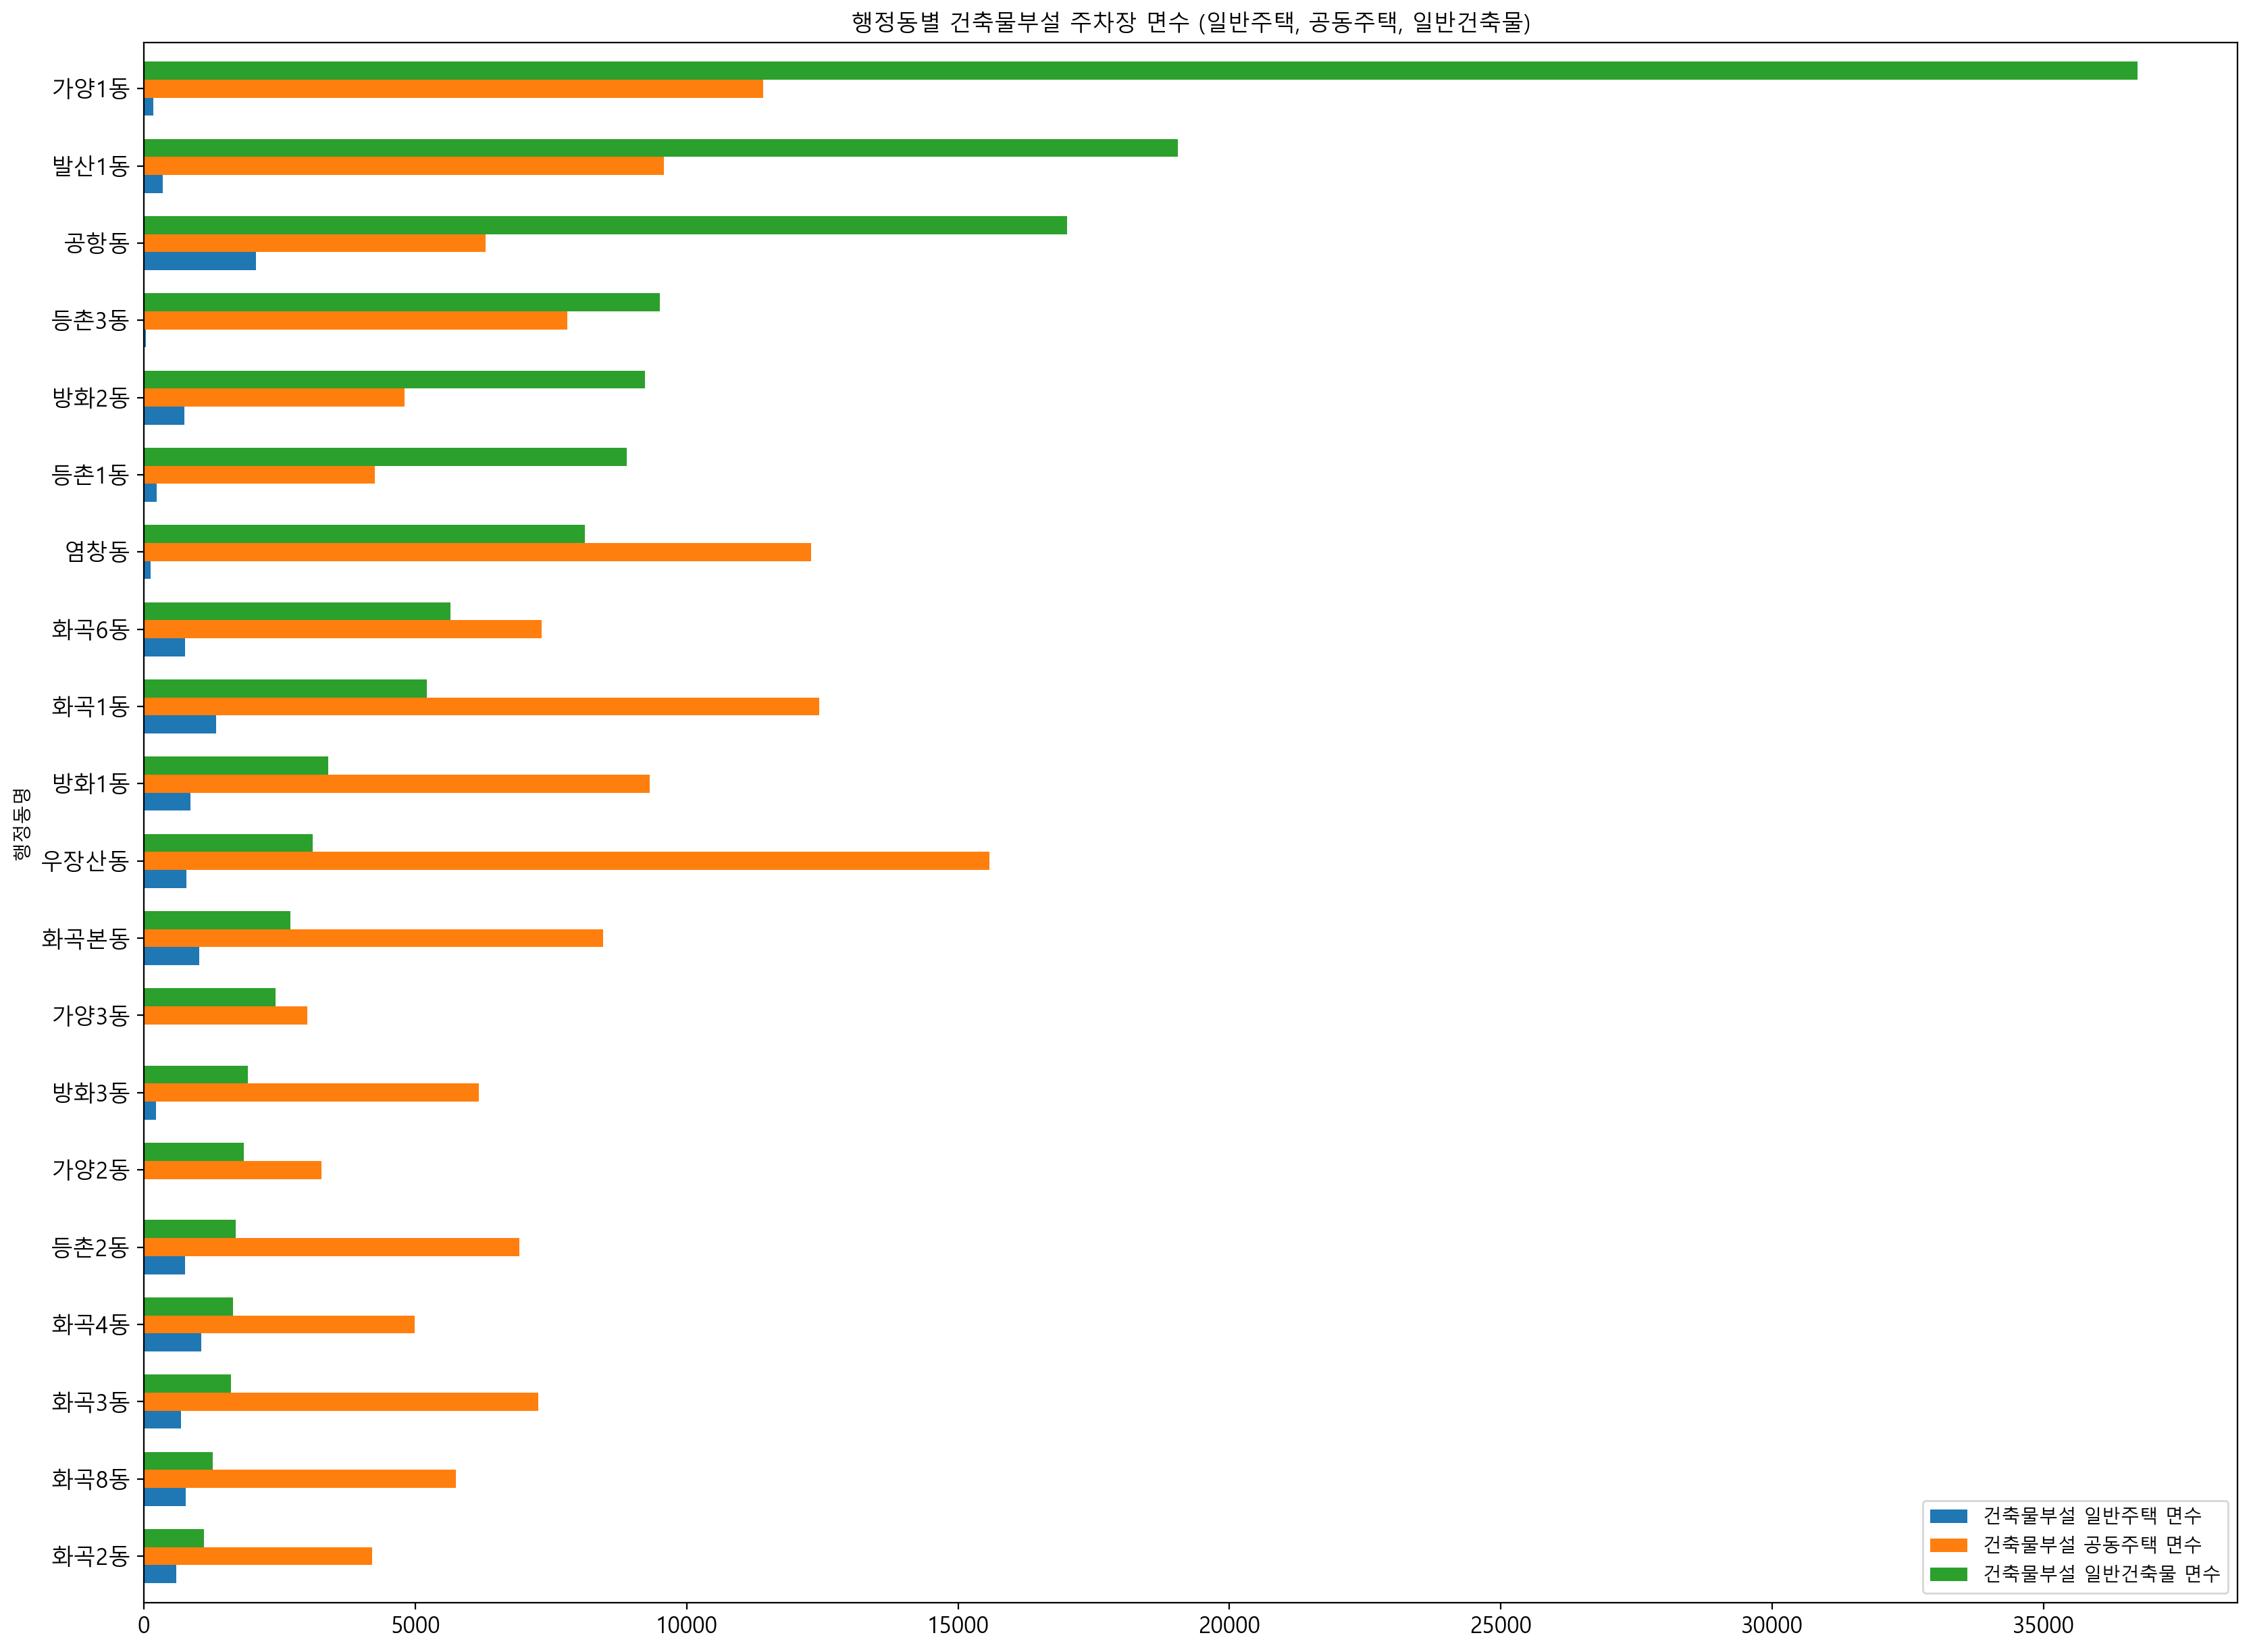

In [220]:
private2.plot(kind='barh', figsize=(20,15), title='행정동별 건축물부설 주차장 면수 (일반주택, 공동주택, 일반건축물)', width=0.7, fontsize=12)
#plt.savefig('행정동별 건축물부설 주차장 면수 (일반주택, 공동주택, 일반건축물).png')